# 2. Conexão e Análise dos Dados

In [2]:
# Importando os pacotes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Pegando as colunas do DF

col_names = pd.read_csv('dados_filtrados.csv', nrows=0, sep=';').columns

In [4]:
col_names

Index(['CONTADOR', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL0',
       'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'OCUP',
       'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE',
       'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ',
       'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO',
       'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA',
       'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII',
       'CAUSABAS', 'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB',
       'FONTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO', 'ATESTANTE',
       'FONTEINV', 'DTRECEBIM', 'CAUSAMAT', 'ESC2010', 'ESCMAE2010', 'DIFDATA',
       'STDOEPIDEM', 'STDONOVA', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV',
       'DTCADINF', 'MORTEPARTO', 'DTCONCASO', 'NUDIASOBIN', 'ANO'],
      dtype='object')

In [5]:
colunms_str = ['DTOBITO', 'HORAOBITO', 'DTNASC','LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII',
       'CAUSABAS', 'DTATESTADO', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO', 'DTRECEBIM',  'DIFDATA',
       'STDOEPIDEM', 'STDONOVA', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV',
       'DTCADINF', 'DTCONCASO']

In [6]:
colunms_int = ['CONTADOR', 'ORIGEM', 'TIPOBITO', 'NATURAL0','IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'OCUP',
             'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE',
               'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ',
               'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO',
               'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA',
               'NECROPSIA','COMUNSVOIM', 'CIRCOBITO', 'ACIDTRAB','FONTE','TPPOS','ATESTANTE',
               'FONTEINV', 'CAUSAMAT', 'ESC2010', 'ESCMAE2010', 'MORTEPARTO','NUDIASOBIN', 'ANO']

In [7]:
# Importando o dataFrame - todos como str

df = pd.read_csv('dados_filtrados.csv', sep=';', dtype=str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 68 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CONTADOR    211593 non-null  object
 1   ORIGEM      211593 non-null  object
 2   TIPOBITO    211593 non-null  object
 3   DTOBITO     211593 non-null  object
 4   HORAOBITO   208415 non-null  object
 5   NATURAL0    174587 non-null  object
 6   DTNASC      211484 non-null  object
 7   IDADE       211593 non-null  object
 8   SEXO        211593 non-null  object
 9   RACACOR     205564 non-null  object
 10  ESTCIV      206211 non-null  object
 11  ESC         200701 non-null  object
 12  OCUP        187751 non-null  object
 13  CODMUNRES   211593 non-null  object
 14  LOCOCOR     211593 non-null  object
 15  CODESTAB    132717 non-null  object
 16  CODMUNOCOR  211593 non-null  object
 17  IDADEMAE    0 non-null       object
 18  ESCMAE      0 non-null       object
 19  SERIESCMAE  0 non-null 

In [9]:
# Verificando se possui dados nulos
df.isnull().values.any()

True

In [10]:
# Calculando o percentual dos dados que estão em branco

percentual_nulos = (df.isnull().sum() / len(df)) * 100
percentual_nulos[percentual_nulos > 0].sort_values(ascending=False)

PESO          100.000000
OCUPMAE       100.000000
CAUSAMAT      100.000000
OBITOPARTO    100.000000
PARTO         100.000000
GESTACAO      100.000000
SEMAGESTAC    100.000000
GRAVIDEZ      100.000000
QTDFILMORT    100.000000
QTDFILVIVO    100.000000
SERIESCMAE    100.000000
ESCMAE        100.000000
IDADEMAE      100.000000
ACIDTRAB      100.000000
DTCADINF      100.000000
MORTEPARTO    100.000000
DTCONCASO     100.000000
ESCMAE2010    100.000000
DTCADINV       99.999055
TPOBITOCOR     99.999055
DTCONINV       99.999055
NUDIASOBIN     99.998582
FONTE          99.983931
CIRCOBITO      99.982986
TPMORTEOCO     99.779766
OBITOPUERP     99.776930
OBITOGRAV      99.776458
CIRURGIA       99.180030
EXAME          99.167269
COMUNSVOIM     93.338627
DTINVESTIG     87.268955
FONTEINV       86.826124
LINHAD         77.300289
LINHAC         50.567363
LINHAII        45.238264
CODESTAB       37.277226
TPPOS          34.498778
ASSISTMED      28.642252
NECROPSIA      28.428162
LINHAB         21.025270


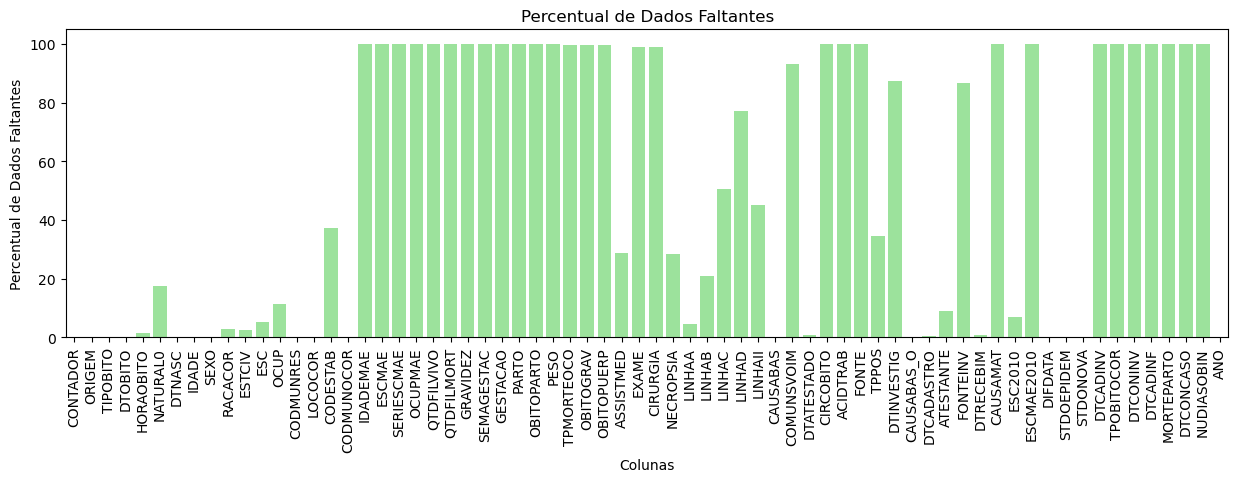

In [11]:
plt.figure(figsize=(15, 4))
sns.barplot(x=percentual_nulos.index, y=percentual_nulos.values, color='lightgreen')
plt.title('Percentual de Dados Faltantes')
plt.xlabel('Colunas')
plt.ylabel('Percentual de Dados Faltantes')
plt.xticks(rotation=90) # deixa os labels em pé, melhor p ver

plt.show()

## Dicionário dos dados de Mortalidade

| Coluna         | Descrição                                                                                                         | Ação                       | Tipo  | % Dados Faltantes |
|----------------|-------------------------------------------------------------------------------------------------------------------|----------------------------|-------|-------------------|
| Contador       | ID ordenado dos registros na tabela                                                                              | Descartar                  | -     | -                 |
| Origem         | Banco de dados de Origem da Informação                                                                           | Descartar                  | -     | -                 |
| TIPOBITO       | Óbito Fetal - Morte antes do nascimento                                                                          | Descartar                  | -     | -                 |
| DtObito        | Data em que ocorreu o óbito                                                                                      | Descartar                  | -     | -                 |
| HORAOBITO      | Hora do óbito                                                                                                    | Descartar                  | -     | -                 |
| Natural0       | País e Unidade de Federação onde o falecido nasceu                                                               | Manter                     | Int   | 17%               |
| DTNASC         | Data de Nascimento                                                                                               | Descartar                  | -     | -                 |
| Idade          | Idade do Falecido codificada                                                                                     | Manter                     | Int   | -                 |
| Sexo           | Sexo do Falecido                                                                                                 | Manter                     | Int   | -                 |
| RacaCor        | Cor informada pelo responsável pelas informações                                                                 | Manter                     | Int   | 2%                |
| EstCiv         | Estado Civil do falecido                                                                                         | Manter                     | Int   | 2%                |
| Esc            | Escolaridade em anos                                                                                             | Manter                     | Int   | 5%                |
| OCUP           | Tipo de trabalho predominante na vida do falecido                                                                | Manter                     | Int   | 11%               |
| CodMunRes      | Código do município de residência                                                                                | Manter                     | Int   | -                 |
| LOCOCOR        | Local de ocorrência do óbito                                                                                     | Manter                     | Int   | -                 |
| CODESTAB       | Código do Estabelecimento                                                                                        | Descartar                  | -     | -                 |
| CODMUNOCOR     | Código do município onde ocorreu o óbito                                                                         | Manter                     | Int   | -                 |
| IdadeMae       | Idade da mãe                                                                                                     | Descartar                  | -     | 100%              |
| ESCMAE         | Escolaridade da mãe                                                                                              | Descartar                  | -     | 100%              |
| SERIESCMAE     | Última série escolar concluída pela mãe                                                                          | Descartar                  | -     | 100%              |
| OCUPMAE        | Trabalho da mãe                                                                                                  | Descartar                  | -     | 100%              |
| QTDFILVIVO     | Número de filhos vivos                                                                                           | Descartar                  | -     | 100%              |
| QTDFILMORT     | Número de filhos mortos                                                                                          | Descartar                  | -     | 100%              |
| GRAVIDEZ       | Óbito na gravidez                                                                                                | Descartar                  | -     | 100%              |
| SEMAGESTAC     | Semanas de gestação                                                                                              | Descartar                  | -     | 100%              |
| GESTACAO       | Faixas de semanas de gestação                                                                                    | Descartar                  | -     | 100%              |
| PARTO          | Tipo de parto                                                                                                    | Descartar                  | -     | 100%              |
| OBITOPARTO     | Óbito no parto                                                                                                   | Descartar                  | -     | 100%              |
| PESO           | Peso ao nascer                                                                                                   | Descartar                  | -     | 100%              |
| TPMORTEOCO     | Situação gestacional/pósgestacional do óbito                                                                    | Descartar                  | -     | 99%               |
| OBITOGRAV      | Óbito na gravidez                                                                                                | Descartar                  | -     | 99%               |
| OBITOPUERP     | Óbito no puerpério                                                                                               | Descartar                  | -     | 99%               |
| ASSISTMED      | Atendimento médico durante a enfermidade                                                                         | Manter                     | Int   | 28%               |
| EXAME          | Realização de exame                                                                                              | Descartar                  | -     | 99%               |
| CIRURGIA       | Realização de cirurgia                                                                                           | Descartar                  | -     | 99%               |
| NECROPSIA      | Execução ou não de necropsia                                                                                     | Manter                     | Int   | 28%               |
| LINHAA         | Causa terminal                                                                                                   | Manter                     | Str   | -                 |
| LINHAB         | Causa antecedente                                                                                                | Manter                     | Str   | -                 |
| LINHAC         | Causa antecedente                                                                                                | Manter                     | Str   | -                 |
| LINHAD         | Causa básica                                                                                                     | Manter                     | Str   | -                 |
| LINHAII        | Causa contribuinte                                                                                               | Manter                     | Str   | -                 |
| CAUSABAS       | Causa básica                                                                                                     | Manter                     | Str   | -                 |
| COMUNSVOIM     | Código do município do SVO ou IML                                                                                | Descartar                  | -     | 92%               |
| DTATESTADO     | Data do atestado                                                                                                 | Descartar                  | -     | -                 |
| CIRCOBITO      | Tipo de morte violenta                                                                                           | Descartar                  | -     | 99%               |
| ACIDTRAB       | Óbito relacionado ao trabalho                                                                                    | Descartar                  | -     | 99%               |
| FONTE          | Fonte da informação                                                                                              | Descartar                  | -     | -                 |
| TPPOS          | Óbito investigado                                                                                                | Descartar                  | -     | 100%              |
| DTINVESTIG     | Data da investigação                                                                                             | Descartar                  | -     | -                 |
| CAUSABAS_O     | Causa básica informada antes da resseleção                                                                       | Manter                     | Str   | -                 |
| DTCADASTRO     | Data do cadastro                                                                                                 | Descartar                  | -     | -                 |
| ATESTANTE      | Médico atendeu o paciente?                                                                                       | Manter                     | Int   | 10%               |
| FONTEINV       | Fonte da investigação                                                                                            | Descartar                  | -     | 86%               |
| DTRECEBIM      | Data de recebimento                                                                                              | Descartar                  | -     | -                 |
| CAUSAMAT       | CID causa materna                                                                                                | Descartar                  | -     | 100%              |
| ESC2010        | Escolaridade última série concluída (falecido)                                                                   | Manter                     | Int   | 7%                |
| ESCMAE2010     | Escolaridade última série concluída (mãe)                                                                        | Descartar                  | -     | 100%              |
| DIFDATA        | Diferença entre datas                                                                                            | Descartar                  | -     | -                 |
| STDOEPIDEM     | Status DO Epidemiológica                                                                                         | Descartar                  | Int   | -                 |
| STDONOVA       | Status DO Nova                                                                                                   | Descartar                  | Int   | -                 |
| DTCADINV       | Data do cadastro de investigação                                                                                 | Manter                     | Str   | -                 |
| TPOBITOCOR     | Momento da ocorrência do óbito                                                                                   | Descartar                  | Int   | -                 |
| DTCONINV       | Data da conclusão da investigação                                                                                | Manter                     | Str   | -                 |
| DTCADINF       | Indica se houve investigação                                                                                     | Manter                     | Str   | -                 |
| MORTEPARTO     | Falta descrição na fonte                                                                                         | Descartar                  | -     | -                 |
| DTCONCASO      | Data da conclusão do caso                                                                                        | Descartar                  | Str   | -                 |
| NUDIASOBIN     | Dias entre óbito e conclusão da investigação                                                                     | Descartar                  | -     | 99%               |
| ANO            | Ano que a morte ocorreu                                                                                          | Manter                     | Str   | -                 |


# 3. Processamento de Dados

## 1. Alterando o dtype dos dados

In [16]:
for cols in col_names:
    if cols not in colunms_str:
        df[cols] = pd.to_numeric(df[cols], errors='coerce').astype('Int64')

## 2. Descartar colunas irrelevantes / que não serão utilizadas para esta pesquisa

In [18]:
df.drop(['CONTADOR', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'DTNASC', 'CODESTAB', 'IDADEMAE', 'ESCMAE', 'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO',
        'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP', 'EXAME', 'CIRURGIA',
        'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'TPPOS', 'DTINVESTIG', 'DTCADASTRO', 'FONTEINV', 'DTRECEBIM', 'CAUSAMAT', 'ESCMAE2010',
        'DIFDATA', 'STDOEPIDEM', 'STDONOVA', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV', 'DTCADINF', 'MORTEPARTO', 'DTCONCASO', 'NUDIASOBIN'], axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   NATURAL0    174587 non-null  Int64 
 1   IDADE       211593 non-null  Int64 
 2   SEXO        211593 non-null  Int64 
 3   RACACOR     205564 non-null  Int64 
 4   ESTCIV      206211 non-null  Int64 
 5   ESC         200701 non-null  Int64 
 6   OCUP        187751 non-null  Int64 
 7   CODMUNRES   211593 non-null  Int64 
 8   LOCOCOR     211593 non-null  Int64 
 9   CODMUNOCOR  211593 non-null  Int64 
 10  ASSISTMED   150988 non-null  Int64 
 11  NECROPSIA   151441 non-null  Int64 
 12  LINHAA      201645 non-null  object
 13  LINHAB      167105 non-null  object
 14  LINHAC      104596 non-null  object
 15  LINHAD      48031 non-null   object
 16  LINHAII     115872 non-null  object
 17  CAUSABAS    211593 non-null  object
 18  CAUSABAS_O  211459 non-null  object
 19  ATESTANTE   192230 non-

## 3. Tratamento de Dados Faltantes

In [21]:
# Calculando o percentual dos dados que estão em branco

percentual_nulos = (df.isnull().sum() / len(df)) * 100
percentual_nulos[percentual_nulos > 0].sort_values(ascending=False)

LINHAD        77.300289
LINHAC        50.567363
LINHAII       45.238264
ASSISTMED     28.642252
NECROPSIA     28.428162
LINHAB        21.025270
NATURAL0      17.489236
OCUP          11.267859
ATESTANTE      9.151059
ESC2010        7.075376
ESC            5.147618
LINHAA         4.701479
RACACOR        2.849338
ESTCIV         2.543562
CAUSABAS_O     0.063329
dtype: float64

#### Imputação de dados

De acordo com o dicionário dos dados de mortalidade, algumas variáveis utilizam o valor 9 para indicar 'Não informado'.

In [24]:
df[['ASSISTMED', 'NECROPSIA', 'ESC2010', 'ESC', 'ESTCIV']] = df[['ASSISTMED', 'NECROPSIA', 'ESC2010', 'ESC', 'ESTCIV']].fillna(9)

Para as demais, será utilizado o valor 0 para indicar que 'Não se Aplica' / 'Não Informado'

In [26]:
df[['LINHAD', 'LINHAII', 'LINHAC', 'LINHAB', 'LINHAA', 'CAUSABAS_O', 'NATURAL0', 'OCUP', 'ATESTANTE', 'RACACOR']] = df[['LINHAD', 'LINHAII', 'LINHAC', 'LINHAB', 'LINHAA', 'CAUSABAS_O', 'NATURAL0', 'OCUP', 'ATESTANTE', 'RACACOR']].fillna(0)

In [27]:
df.isnull().values.any()

False

In [28]:
df.head() 

NATURAL0  IDADE  SEXO  RACACOR  ESTCIV  ESC    OCUP  CODMUNRES  LOCOCOR  \
0         0    497     2        4       3    1  999993     290840        3   
1         0    467     1        1       4    2  999993     290840        3   
2         0    473     1        1       2    3  621005     230240        3   
3         0    483     1        1       2    1       0     210230        3   
4         0    492     2        1       3    0       0     210150        3   

   CODMUNOCOR  ...  LINHAA  LINHAB LINHAC LINHAD LINHAII CAUSABAS CAUSABAS_O  \
0      290840  ...   *G300   *R54X      0      0       0     G300       G300   
1      290840  ...   *G300       0      0      0   *I64X     G300       G300   
2      230240  ...   *J969   *E46X  *G300      0       0     G300       G300   
3      210230  ...   *G300       0      0      0       0     G300       G300   
4      210150  ...   *G300       0      0      0       0     G300       G300   

  ATESTANTE ESC2010   ANO  
0         5       0  2012  
1         5       1  2012  
2         1       1  2012  
3         0       0  2012  
4         5       9  2012  

[5 rows x 22 columns]

## 4. Tratamento das colunas de CID

Devido a algumas linhas da coluna CID conterem mais de um valor, será necessário realizar um tratamento nessas linhas. Para isso, utilizaremos o método de split com base no caractere *. Após essa divisão, cada letra presente no CID será codificado, transformando-o no tipo int. Esse procedimento visa facilitar a aplicação de algoritmos posteriormente, garantindo que os dados estejam em um formato adequado para análise.

In [31]:
# Verifica a quantidade de * presente nas linhas

max_splits_A = df['LINHAA'].str.count(r'\*').max()
max_splits_B = df['LINHAB'].str.count(r'\*').max()
max_splits_C = df['LINHAC'].str.count(r'\*').max()
max_splits_D = df['LINHAD'].str.count(r'\*').max()
max_splits_II = df['LINHAII'].str.count(r'\*').max()


print(max_splits_A, max_splits_B, max_splits_C, max_splits_D, max_splits_II)

4.0 4.0 4.0 4.0 9.0


In [32]:
# Separar os CID's, criando novas colunas

# Lista das colunas de CID para realizar a separação
df_linhas = ['LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII']

# Vetor auxiliar
df_splited = []

# Percorre as linhas do df realizando o split, renomeando as colunas e preenchendo como 0 colunas sem informações
for linhas in df_linhas:
    try:
        # Separa os CID's em colunas
        df_split = df[linhas].str.split('*', expand=True)
        
        # realiza o split no primeiro *, fazendo com que a primeira coluna seja nula, sendo necessário dropar
        df_split = df_split.drop(0, axis=1)
        
        # renomeia as colunas criadas para linha_i com base na quantidade de colunas
        df_split.columns = [f'{linhas}_{i+1}' for i in range(df_split.shape[1])]
        
        # linhas que ficaram sem valor recebem 0
        df_split = df_split.replace('', 0).fillna(0)
        
        # adiciona esse novo "df" na lista aux para realizar o outro loop com a prox linha
        df_splited.append(df_split)
        
    except:
        pass

In [33]:
df_splited

[       LINHAA_1 LINHAA_2 LINHAA_3 LINHAA_4
 0          G300        0        0        0
 1          G300        0        0        0
 2          J969        0        0        0
 3          G300        0        0        0
 4          G300        0        0        0
 ...         ...      ...      ...      ...
 211588        0        0        0        0
 211589     G309        0        0        0
 211590     R54X        0        0        0
 211591        0        0        0        0
 211592     A403        0        0        0
 
 [211593 rows x 4 columns],
        LINHAB_1 LINHAB_2 LINHAB_3 LINHAB_4
 0          R54X        0        0        0
 1             0        0        0        0
 2          E46X        0        0        0
 3             0        0        0        0
 4             0        0        0        0
 ...         ...      ...      ...      ...
 211588     I509        0        0        0
 211589        0        0        0        0
 211590        0        0        0        0
 2

In [34]:
# Transformando o CID's em colunas numéricas:

def substituir_letras(cid):
    # Verifica se é string
    if isinstance(cid, str):
        aux = ""
        
        for digito in cid:
            # verifica se é letra (a - z)
            if digito.isalpha():
                # ord -> converte caracteres em inteiros
                numero = ord(digito.upper()) - ord('A') + 1
                # concatena à string auxiliar criada
                aux += str(numero)

            # se for numero, continua
            else:
                aux += digito     
        return aux
    return cid

##### DICIONARIO COM A CODIFICAÇÃO POR LETRA:
| Letra | Número |
|-------|--------|
| A     | 1      |
| B     | 2      |
| C     | 3      |
| D     | 4      |
| E     | 5      |
| F     | 6      |
| G     | 7      |
| H     | 8      |
| I     | 9      |
| J     | 10     |
| K     | 11     |
| L     | 12     |
| M     | 13     |
| N     | 14     |
| O     | 15     |
| P     | 16     |
| Q     | 17     |
| R     | 18     |
| S     | 19     |
| T     | 20     |
| U     | 21     |
| V     | 22     |
| W     | 23     |
| X     | 24     |
| Y     | 25     |
| Z     | 26     |


In [36]:
# Linhas que passarão pelo tratamento da transformação:
df_linhas = ['LINHAA_1','LINHAA_2','LINHAA_3','LINHAA_4','LINHAB_1','LINHAB_2','LINHAB_3','LINHAB_4','LINHAC_1','LINHAC_2','LINHAC_3',
             'LINHAC_4','LINHAD_1','LINHAD_2','LINHAD_3','LINHAD_4','LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5', 'LINHAII_6',
            'LINHAII_7', 'LINHAII_8', 'LINHAII_9']

# Percorre os DataFrames pertencentes a lista de df_splited
for i in range(len(df_splited)):
    for coluna in df_linhas:
        if coluna in df_splited[i].columns:
            df_splited[i][coluna] = df_splited[i][coluna].apply(substituir_letras)

In [37]:
print(df_splited[3].loc[:3238, 'LINHAD_2'])

0                  0
1                  0
2                  0
3                  0
4                  0
            ...     
3234               0
3235               0
3236               0
3237      1289  7309
3238               0
Name: LINHAD_2, Length: 3239, dtype: object


In [38]:
# Transformar o tipo de dado para inteiro
for i in range(len(df_splited)):
    # preencher na com 0
    df_splited[i] = df_splited[i].fillna(0)

    # garantir a transformação para números
    df_splited[i] = df_splited[i].apply(pd.to_numeric, errors='coerce')

    # transformar para inteiro
    df_splited[i] = df_splited[i].astype('Int64')

In [39]:
# transforma a lista com as novas colunas em uma serie para realizar a concatenação com o df original:
df_splited_final = pd.concat(df_splited, axis=1)

In [40]:
df_splited_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   LINHAA_1   211593 non-null  Int64
 1   LINHAA_2   211593 non-null  Int64
 2   LINHAA_3   211593 non-null  Int64
 3   LINHAA_4   211593 non-null  Int64
 4   LINHAB_1   211593 non-null  Int64
 5   LINHAB_2   211593 non-null  Int64
 6   LINHAB_3   211593 non-null  Int64
 7   LINHAB_4   211593 non-null  Int64
 8   LINHAC_1   211593 non-null  Int64
 9   LINHAC_2   211593 non-null  Int64
 10  LINHAC_3   211593 non-null  Int64
 11  LINHAC_4   211593 non-null  Int64
 12  LINHAD_1   211593 non-null  Int64
 13  LINHAD_2   211592 non-null  Int64
 14  LINHAD_3   211593 non-null  Int64
 15  LINHAD_4   211593 non-null  Int64
 16  LINHAII_1  211593 non-null  Int64
 17  LINHAII_2  211593 non-null  Int64
 18  LINHAII_3  211593 non-null  Int64
 19  LINHAII_4  211593 non-null  Int64
 20  LINHAII_5  211593 non-null

In [41]:
# concatena o df original com o df com as linhas de CID's separadas
df = pd.concat([df, df_splited_final], axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 47 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   NATURAL0    211593 non-null  Int64 
 1   IDADE       211593 non-null  Int64 
 2   SEXO        211593 non-null  Int64 
 3   RACACOR     211593 non-null  Int64 
 4   ESTCIV      211593 non-null  Int64 
 5   ESC         211593 non-null  Int64 
 6   OCUP        211593 non-null  Int64 
 7   CODMUNRES   211593 non-null  Int64 
 8   LOCOCOR     211593 non-null  Int64 
 9   CODMUNOCOR  211593 non-null  Int64 
 10  ASSISTMED   211593 non-null  Int64 
 11  NECROPSIA   211593 non-null  Int64 
 12  LINHAA      211593 non-null  object
 13  LINHAB      211593 non-null  object
 14  LINHAC      211593 non-null  object
 15  LINHAD      211593 non-null  object
 16  LINHAII     211593 non-null  object
 17  CAUSABAS    211593 non-null  object
 18  CAUSABAS_O  211593 non-null  object
 19  ATESTANTE   211593 non-

In [43]:
df.isnull().values.any()

True

In [44]:
df = df.fillna(0)

In [45]:
# Transformando CAUSABAS e CAUSABAS_O

df['CAUSABAS'] = df['CAUSABAS'].apply(substituir_letras)
df['CAUSABAS_O'] = df['CAUSABAS_O'].apply(substituir_letras)

In [46]:
# Transformar para inteiro

causas = ['CAUSABAS', 'CAUSABAS_O']

for x in causas:
    # preencher na com 0
    df[x] = df[x].fillna(0)

    df[x] = df[x].apply(pd.to_numeric, errors='coerce')

    df[x] = df[x].astype('Int64')

In [47]:
df.describe().T

count           mean            std       min       25%  \
NATURAL0    211593.0     670.492162     326.345076       0.0     823.0   
IDADE       211593.0     484.635442       8.675258     460.0     480.0   
SEXO        211593.0       1.648377       0.477686       0.0       1.0   
RACACOR     211593.0       1.634676       1.230144       0.0       1.0   
ESTCIV      211593.0       2.937172       1.717529       1.0       2.0   
ESC         211593.0       3.590596       2.693781       0.0       2.0   
OCUP        211593.0  753991.421219  361116.033687       0.0  612005.0   
CODMUNRES   211593.0  345837.115514   78228.603148  110001.0  310690.0   
LOCOCOR     211593.0       1.889949       1.130931       1.0       1.0   
CODMUNOCOR  211593.0  345888.718516   78259.149256  110001.0  310670.0   
ASSISTMED   211593.0       3.857287       3.774248       1.0       1.0   
NECROPSIA   211593.0       4.190139       3.278456       1.0       2.0   
CAUSABAS    211593.0    7308.631122       4.320358    6009.0    7309.0   
CAUSABAS_O  211593.0    7185.599358    1619.090839       0.0    7309.0   
ATESTANTE   211593.0       2.362271       1.763167       0.0       1.0   
ESC2010     211593.0       2.834805        3.20369       0.0       1.0   
ANO         211593.0    2017.678794       3.101331    2012.0    2015.0   
LINHAA_1    211593.0   26889.912507   52483.012773       0.0    4649.0   
LINHAA_2    211593.0     306.106662    5921.645078       0.0       0.0   
LINHAA_3    211593.0       9.318976     714.612064       0.0       0.0   
LINHAA_4    211593.0       2.369549     420.219073       0.0       0.0   
LINHAB_1    211593.0   18914.340985   39583.907321       0.0    1419.0   
LINHAB_2    211593.0     613.703946   10067.686121       0.0       0.0   
LINHAB_3    211593.0       11.35004    1053.352183       0.0       0.0   
LINHAB_4    211593.0       2.136436     646.314671       0.0       0.0   
LINHAC_1    211593.0   13616.791699    35814.36271       0.0       0.0   
LINHAC_2    211593.0     353.062781    7378.600265       0.0       0.0   
LINHAC_3    211593.0       7.963066     870.541527       0.0       0.0   
LINHAC_4    211593.0       0.123057      46.770809       0.0       0.0   
LINHAD_1    211593.0    6102.557358   24876.020484       0.0       0.0   
LINHAD_2    211593.0     279.835892    5879.811418       0.0       0.0   
LINHAD_3    211593.0      18.574112    1268.935423       0.0       0.0   
LINHAD_4    211593.0       2.371855     431.110447       0.0       0.0   
LINHAII_1   211593.0   17007.115982    38286.71708       0.0       0.0   
LINHAII_2   211593.0    9098.881839   29172.229509       0.0       0.0   
LINHAII_3   211593.0    1124.559111   10444.033155       0.0       0.0   
LINHAII_4   211593.0     268.925031    5075.083921       0.0       0.0   
LINHAII_5   211593.0      69.550042    2749.382373       0.0       0.0   
LINHAII_6   211593.0      22.446683    1640.245856       0.0       0.0   
LINHAII_7   211593.0       2.348669     417.233648       0.0       0.0   
LINHAII_8   211593.0       0.362101       69.49627       0.0       0.0   
LINHAII_9   211593.0       0.101846      33.276727       0.0       0.0   

                 50%       75%       max  
NATURAL0       831.0     835.0     999.0  
IDADE          485.0     490.0     999.0  
SEXO             2.0       2.0       2.0  
RACACOR          1.0       2.0       9.0  
ESTCIV           3.0       3.0       9.0  
ESC              3.0       4.0       9.0  
OCUP        999992.0  999993.0  999994.0  
CODMUNRES   351020.0  410690.0  530010.0  
LOCOCOR          1.0       3.0       9.0  
CODMUNOCOR  351060.0  410690.0  530010.0  
ASSISTMED        1.0       9.0       9.0  
NECROPSIA        2.0       9.0       9.0  
CAUSABAS      7309.0    7309.0    7309.0  
CAUSABAS_O    7309.0    7309.0   25899.0  
ATESTANTE        2.0       5.0       5.0  
ESC2010          1.0       3.0       9.0  
ANO           2018.0    2020.0    2022.0  
LINHAA_1     10960.0   18092.0  259824.0  
LINHAA_2       

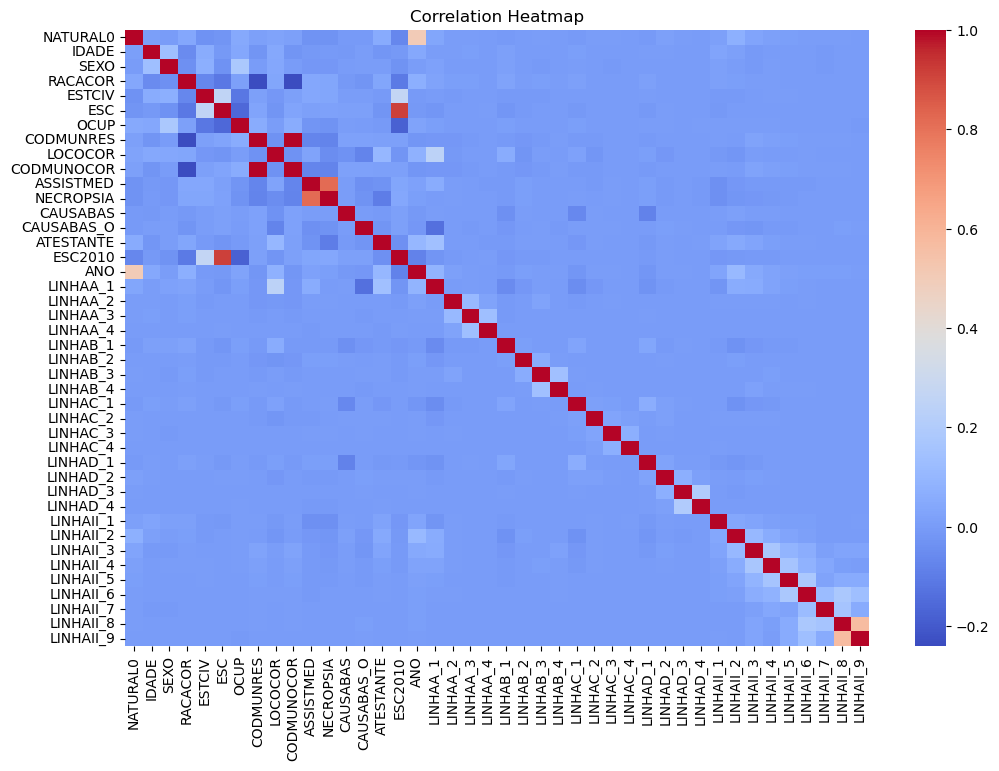

In [48]:
target_columns = df.drop(columns=['LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII'])
numeric_columns = target_columns.select_dtypes(include=['number']).columns

# Compute and plot the heatmap for numeric columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_columns].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

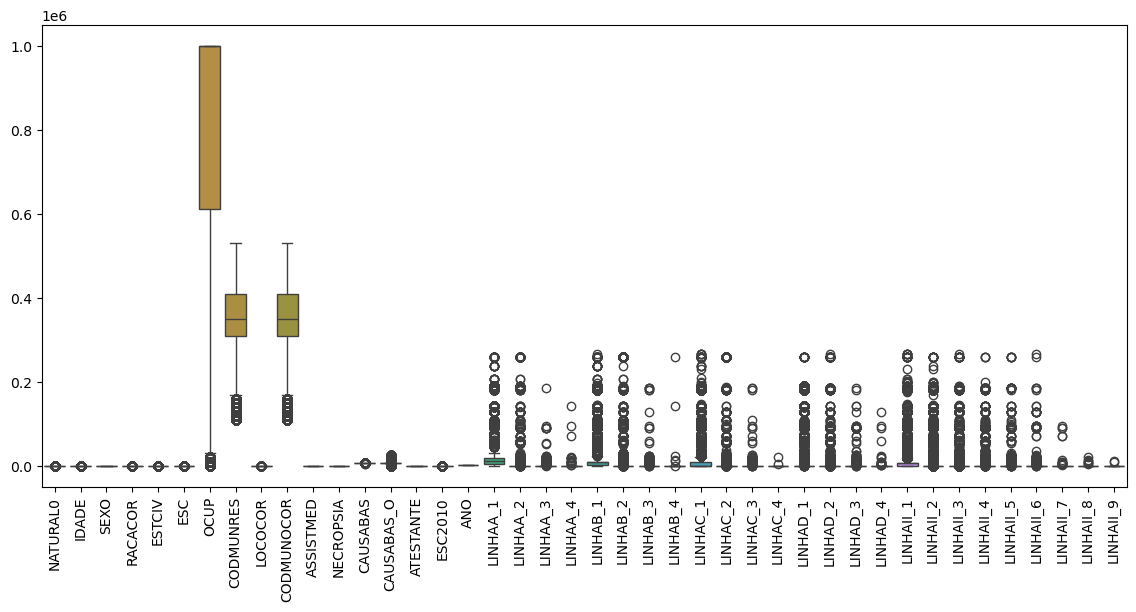

In [49]:
# Outliers

numeric_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(14, 6))
sns.boxplot(numeric_cols)
plt.xticks(rotation=90)
plt.show()

Como os registros são variados (diferentes idades, locais diferentes, ocupação diferente etc) os dados ficam mais dispersos ocasionando em outliers, mas é uma caracterísica do dado de saúde, e não um erro. Para futuras implementações, será necessário considerar essa característica dos dados e implementar algoritmos que sejam mais robustos a outliers

# 4. Aplicando o MAPASOM

In [52]:
from minisom import MiniSom

Selecionando as variáveis que iremos utilizar para aplicar no MAPASOM

In [54]:
df_training = df[
    [
        'LINHAA_1', 'LINHAA_2', 'LINHAA_3', 'LINHAA_4', 'LINHAB_1', 'LINHAB_2', 'LINHAB_3', 'LINHAB_4',
        'LINHAC_1', 'LINHAC_2', 'LINHAC_3', 'LINHAC_4', 'LINHAD_1', 'LINHAD_2', 'LINHAD_3', 'LINHAD_4',
        'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5', 'LINHAII_6', 'LINHAII_7', 'LINHAII_8', 'LINHAII_9',
        'CAUSABAS', 'CAUSABAS_O'
    ]
]

In [55]:
df_training.head()

LINHAA_1  LINHAA_2  LINHAA_3  LINHAA_4  LINHAB_1  LINHAB_2  LINHAB_3  \
0      7300         0         0         0    185424         0         0   
1      7300         0         0         0         0         0         0   
2     10969         0         0         0     54624         0         0   
3      7300         0         0         0         0         0         0   
4      7300         0         0         0         0         0         0   

   LINHAB_4  LINHAC_1  LINHAC_2  ...  LINHAII_2  LINHAII_3  LINHAII_4  \
0         0         0         0  ...          0          0          0   
1         0         0         0  ...          0          0          0   
2         0      7300         0  ...          0          0          0   
3         0         0         0  ...          0          0          0   
4         0         0         0  ...          0          0          0   

   LINHAII_5  LINHAII_6  LINHAII_7  LINHAII_8  LINHAII_9  CAUSABAS  CAUSABAS_O  
0          0          0          0          0          0      7300        7300  
1          0          0          0          0          0      7300        7300  
2          0          0          0          0          0      7300        7300  
3          0          0          0          0          0      7300        7300  
4          0          0          0          0          0      7300        7300  

[5 rows x 27 columns]

## Normalização dos dados com MinMaxScaler

Dimensiona o conjunto de dados de modo que todos os valores estejam no intervalo [0,1]

In [58]:
df_normalized_min = MinMaxScaler().fit_transform(df_training)

### MapaSom com Distância Manhattan

In [60]:
som = MiniSom(x=4, y=4, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='manhattan', random_seed=42)

# Inicialização aleatória - Pesos extraídos aleatoriamente
som.train_random(df_normalized_min, num_iteration=5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.11298498881217374


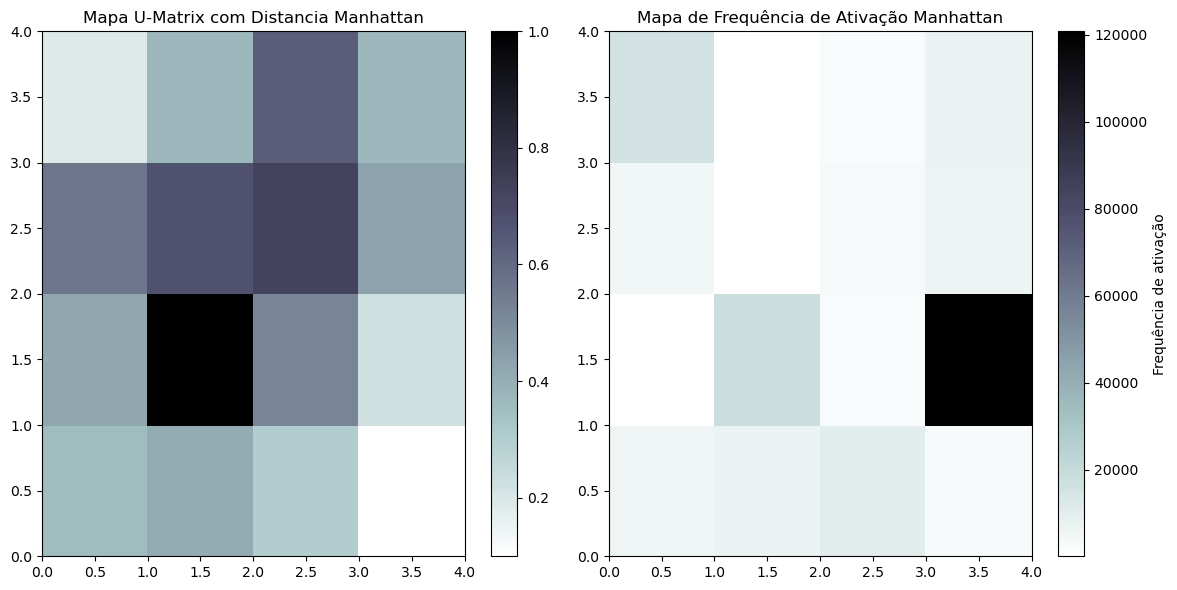

In [61]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix com Distancia Manhattan")

# Mapa de Frequência de Ativação
activation_map = np.zeros((4, 4))
for sample in df_normalized_min:
    winner = som.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação Manhattan')

plt.tight_layout()
plt.show()

Analisando os graficos acima, é possível notar que não houve agrupamento com esses parâmetros passados. Tentaremos com mais iterações

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.10580878008195543


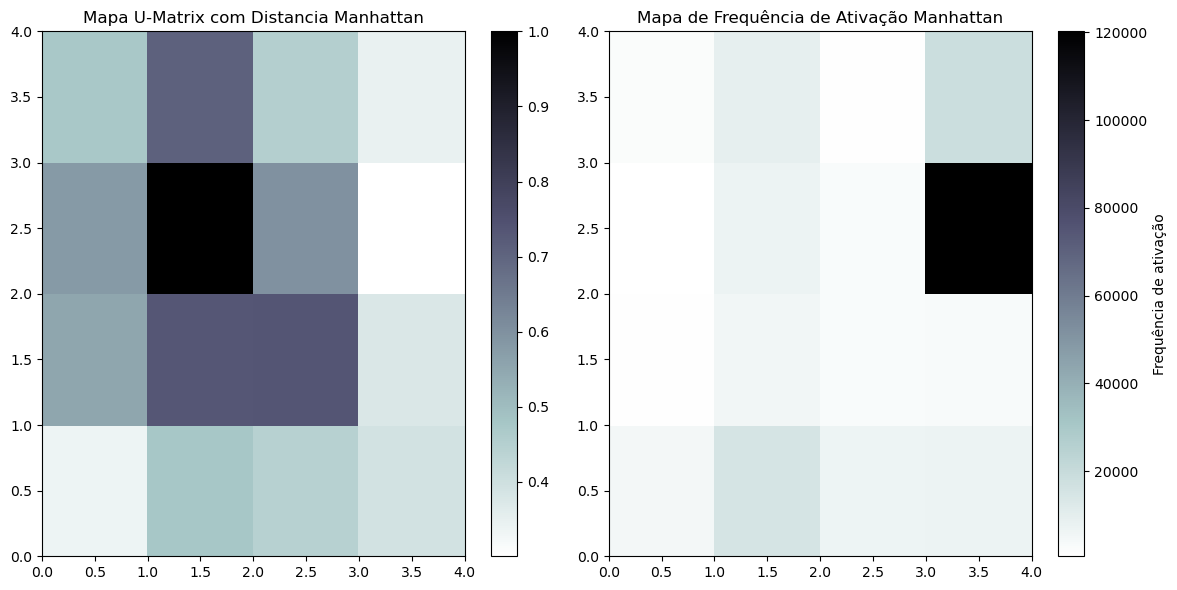

In [63]:
# Passando 50.000 iterações
som.train_random(df_normalized_min, num_iteration=50000, verbose=True)

# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix com Distancia Manhattan")

# Mapa de Frequência de Ativação
activation_map = np.zeros((4, 4))
for sample in df_normalized_min:
    winner = som.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação Manhattan')

plt.tight_layout()
plt.show()

Com mais iterações, o QE diminuiu, mas ainda assim não houve agrupamento

Análise:

A princípio, com a distancia Manhattan, é possível notar que houverem possível cluster, porém com baixa concentração dos dados

#### Testando com outras grades

SOM 2x2 - Erro de quantização: 0.1894616713809749


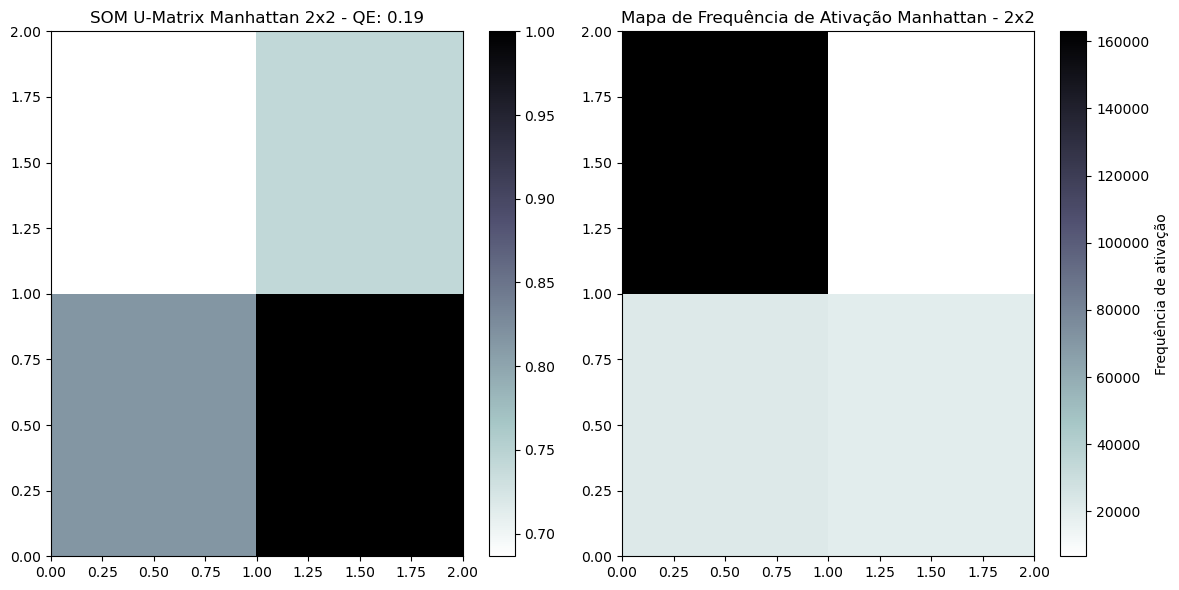

SOM 3x3 - Erro de quantização: 0.12892997875254578


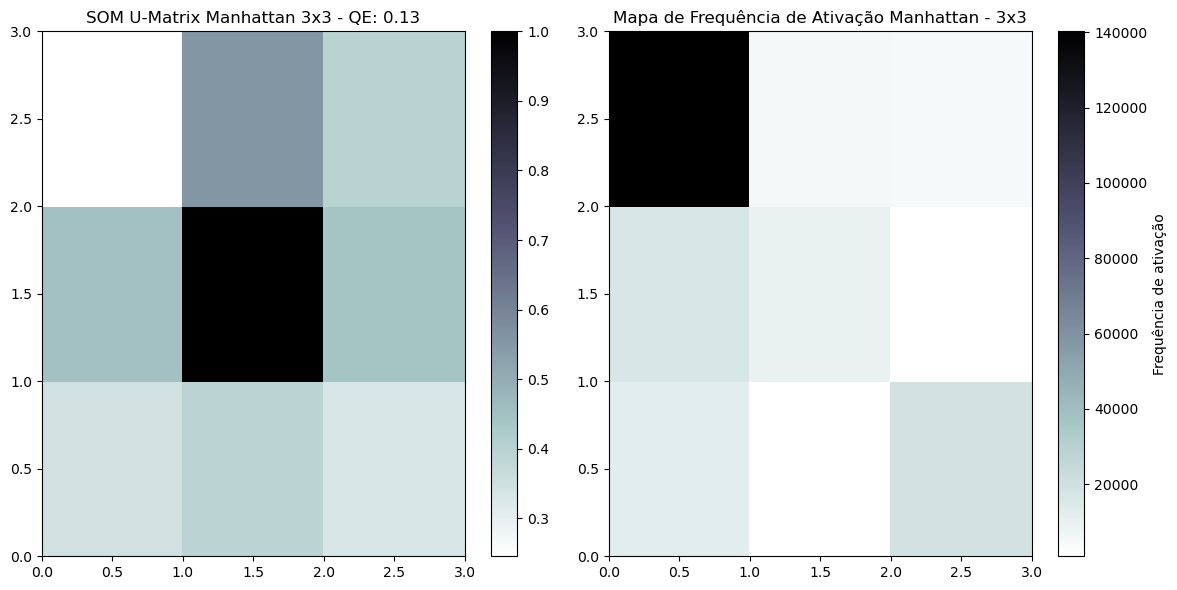

SOM 4x4 - Erro de quantização: 0.11298498881217374


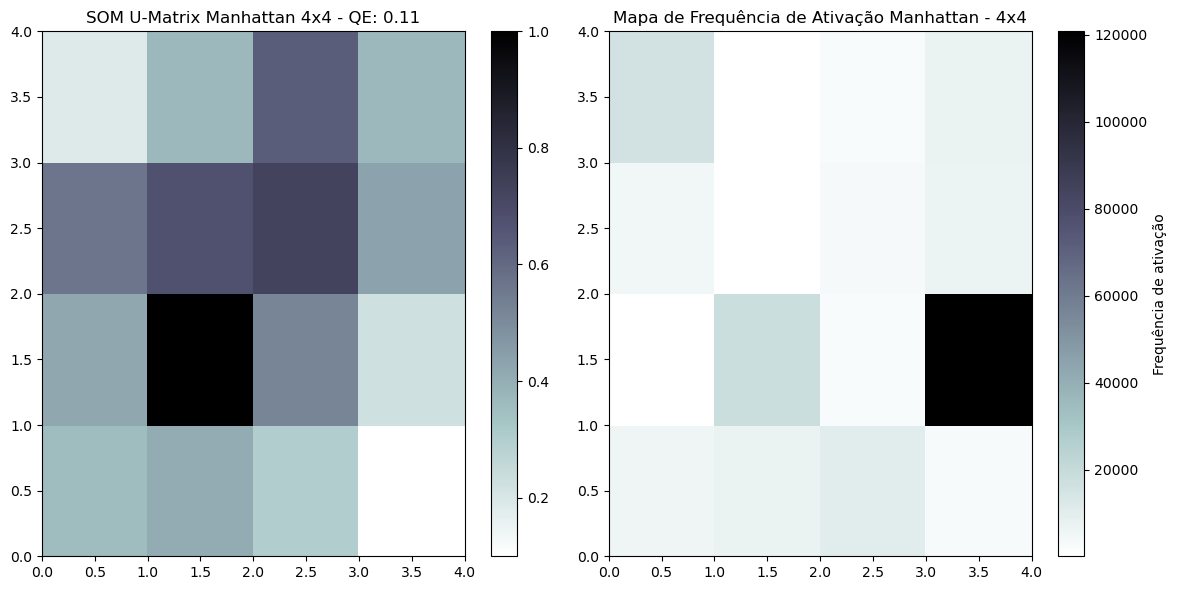

SOM 5x5 - Erro de quantização: 0.10208632118629914


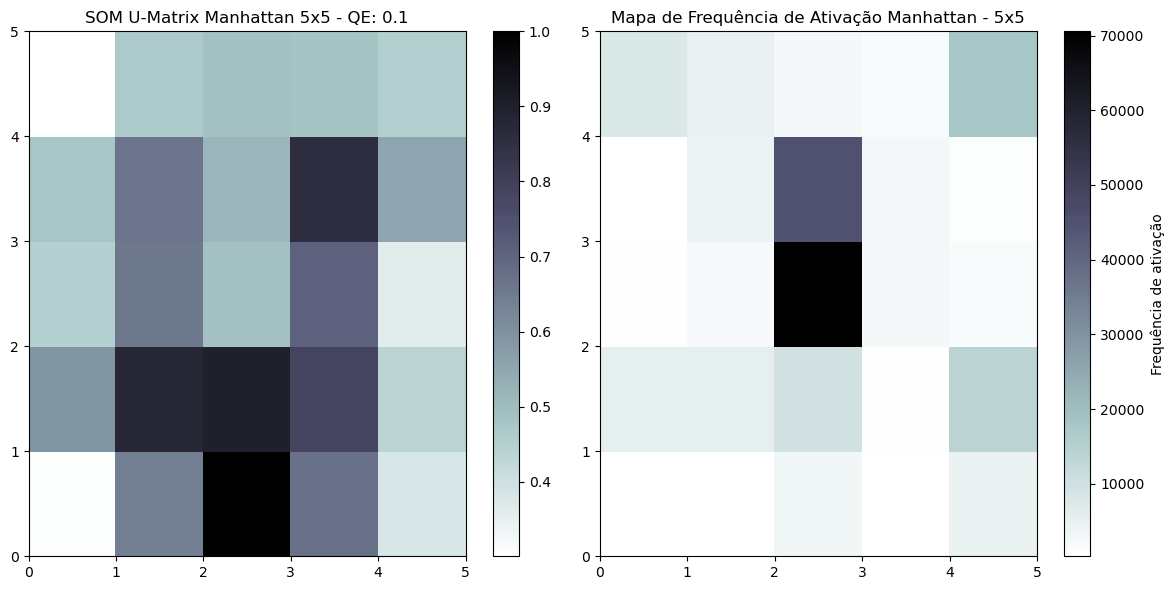

SOM 6x6 - Erro de quantização: 0.09272244766276623


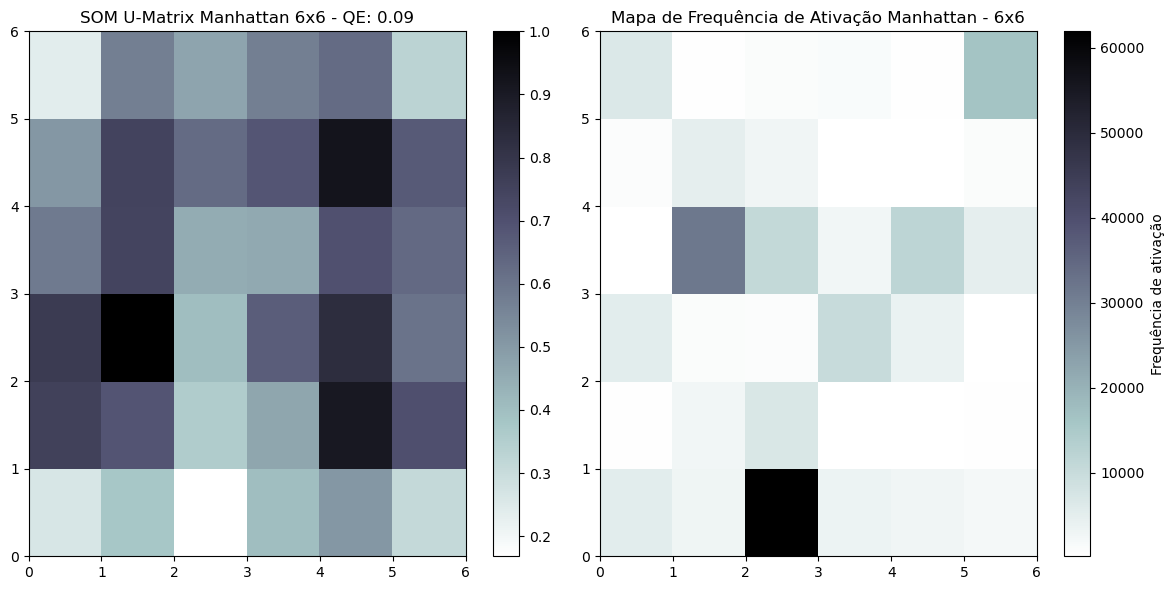

SOM 7x7 - Erro de quantização: 0.08689010070182861


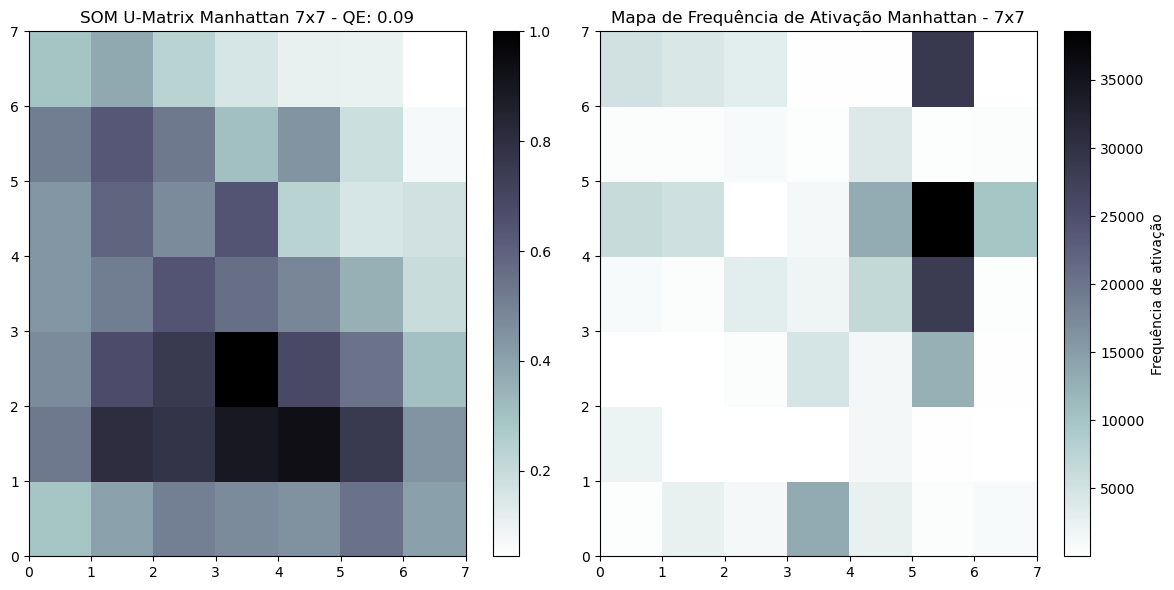

SOM 8x8 - Erro de quantização: 0.08309491744219993


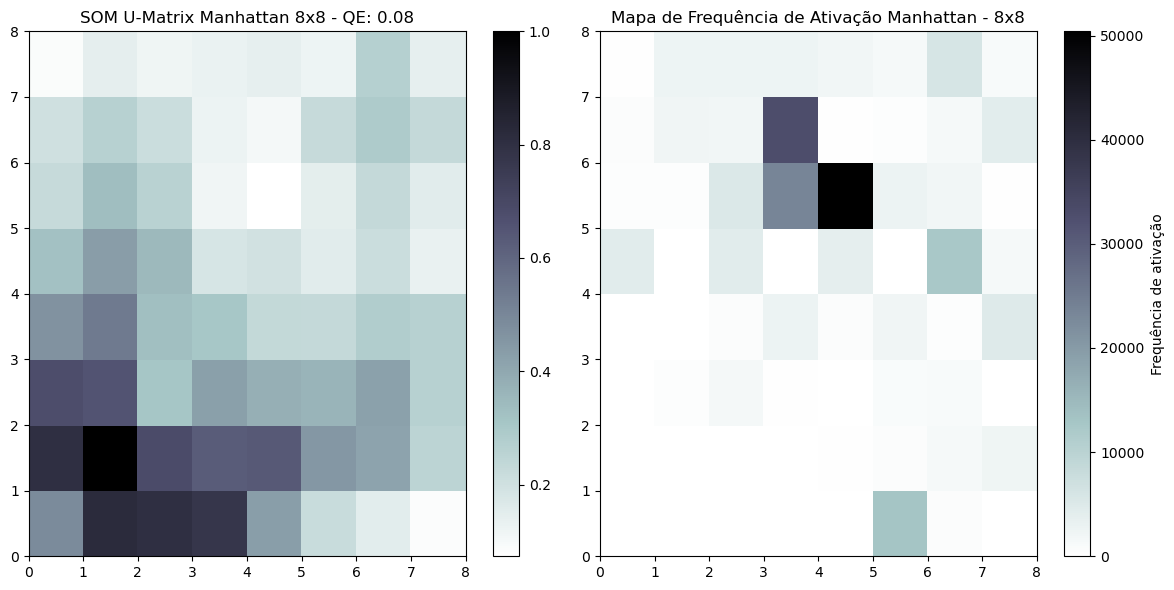

SOM 9x9 - Erro de quantização: 0.07756841259778109


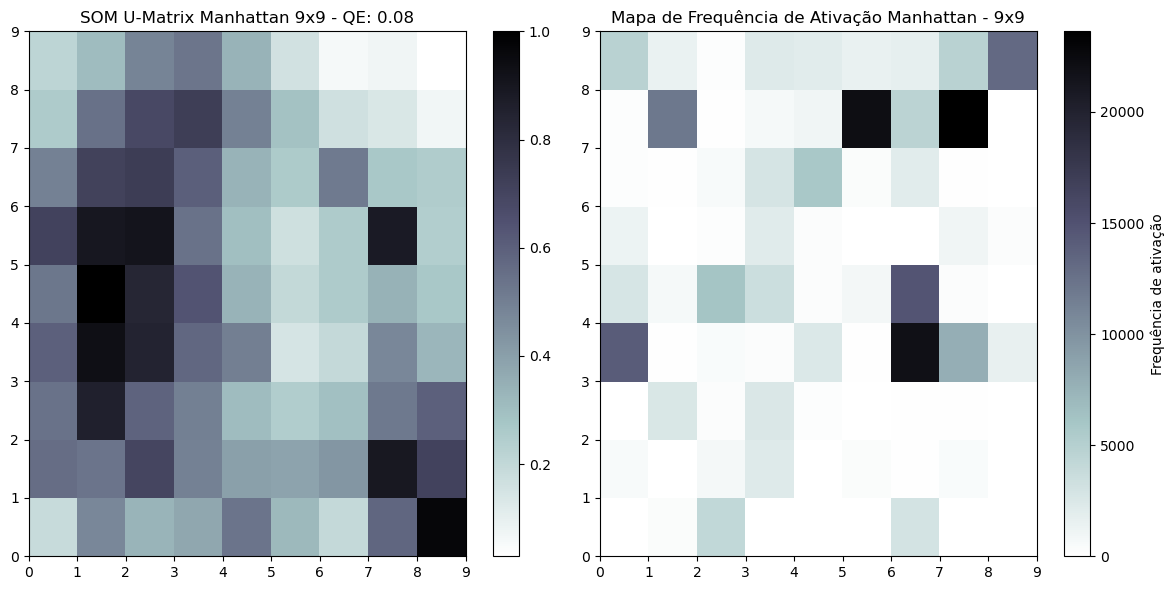

SOM 10x10 - Erro de quantização: 0.07821288459928771


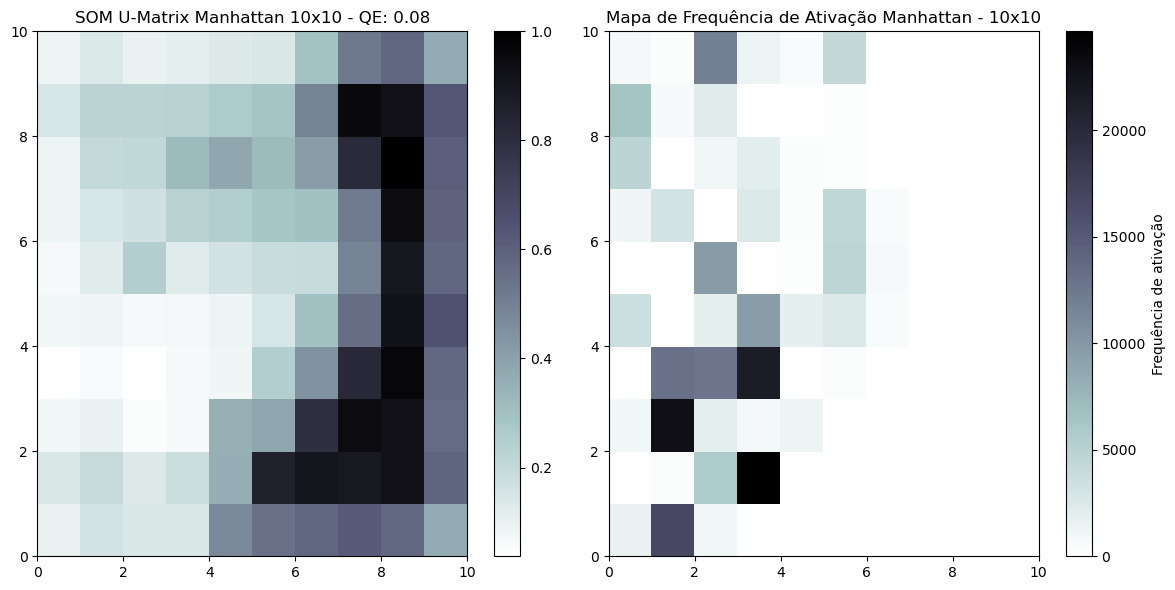

SOM 11x11 - Erro de quantização: 0.07140255806512903


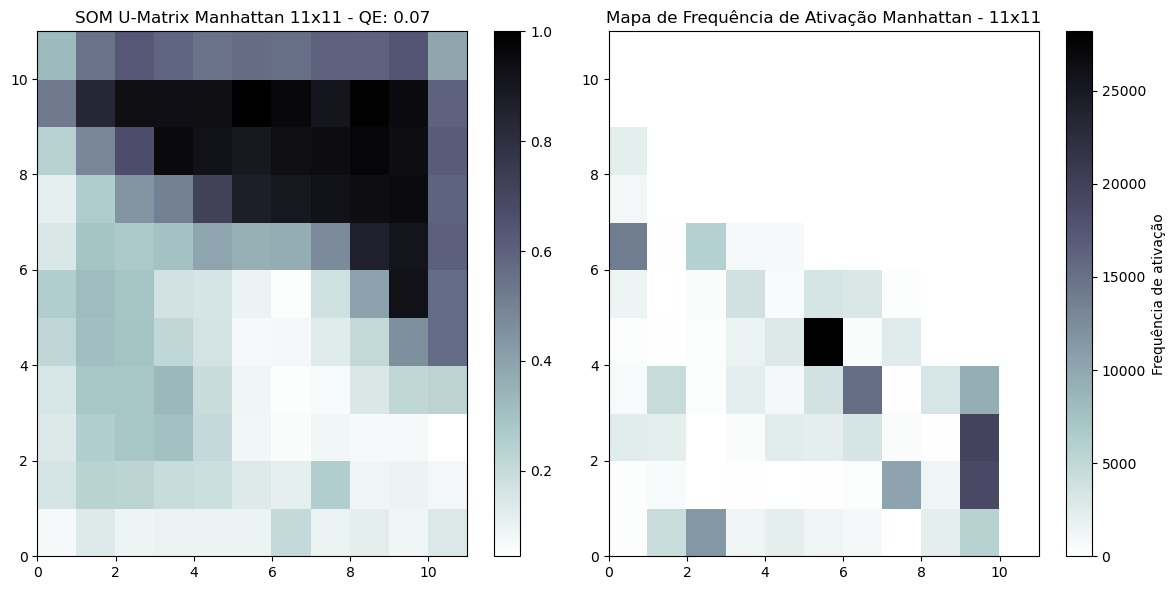

SOM 12x12 - Erro de quantização: 0.0797212209868293


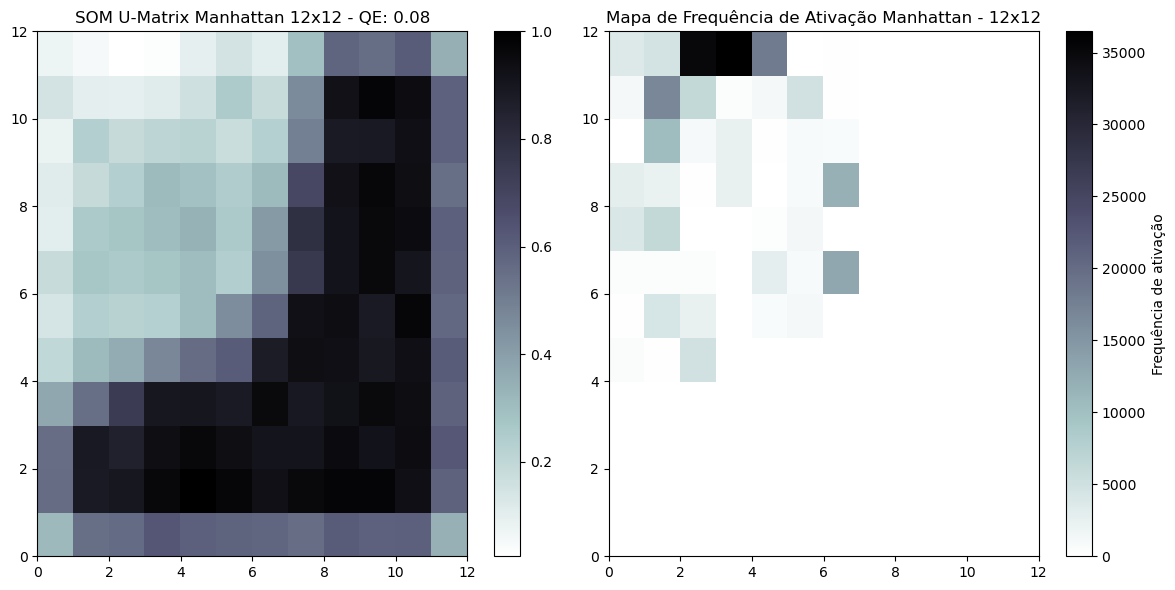

SOM 13x13 - Erro de quantização: 0.08166465580526641


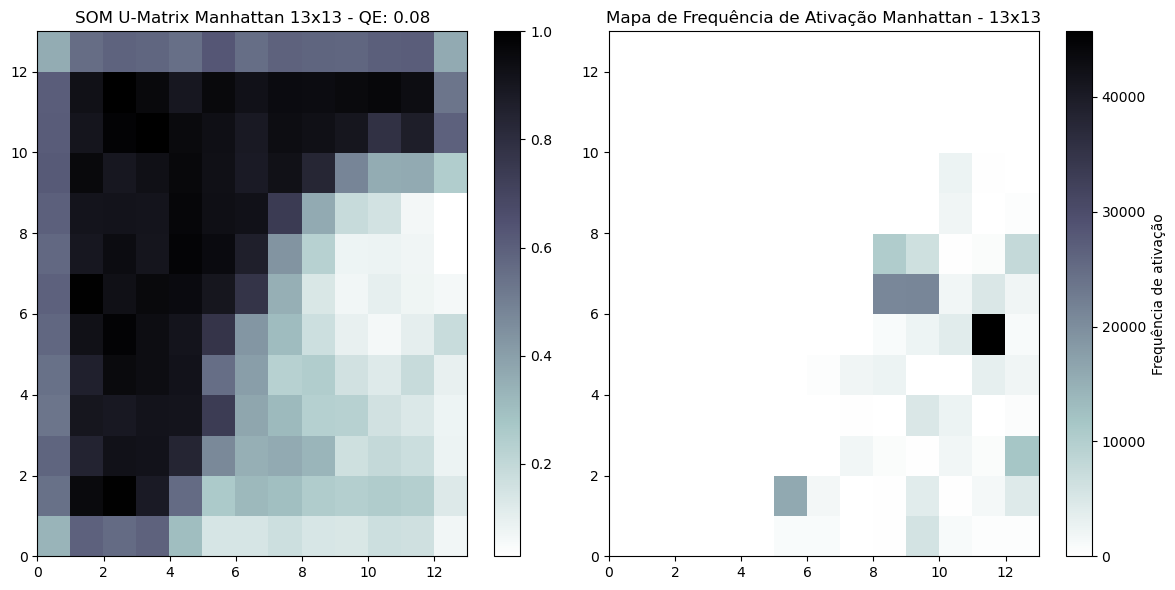

SOM 14x14 - Erro de quantização: 0.07318720346479851


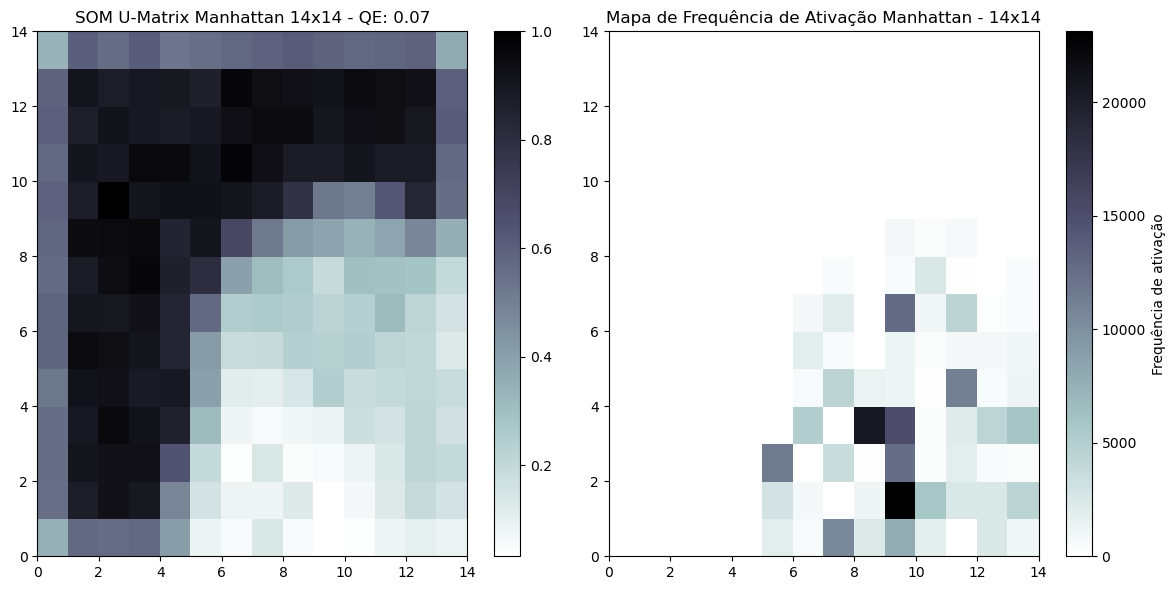

In [67]:
erro = []
sizes = []

for i in range(2, 15):
    som = MiniSom(i, i, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='manhattan', random_seed=42)
    som.train_random(df_normalized_min, 5000)
    qe = som.quantization_error(df_normalized_min)
    erro.append(qe)
    sizes.append(i)
    print(f"SOM {i}x{i} - Erro de quantização: {qe}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Mapa de distância (U-Matrix)
    u_matrix = som.distance_map().T
    grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
    fig.colorbar(grafico1, ax=axes[0])
    axes[0].set_title(f"SOM U-Matrix Manhattan {i}x{i} - QE: {round(qe, 2)}")

    # Mapa de Frequência de Ativação
    activation_map = np.zeros((i, i))
    for sample in df_normalized_min:
        winner = som.winner(sample)
        activation_map[winner] += 1

    grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
    fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
    axes[1].set_title(f'Mapa de Frequência de Ativação Manhattan - {i}x{i}')

    plt.tight_layout()
    plt.show()

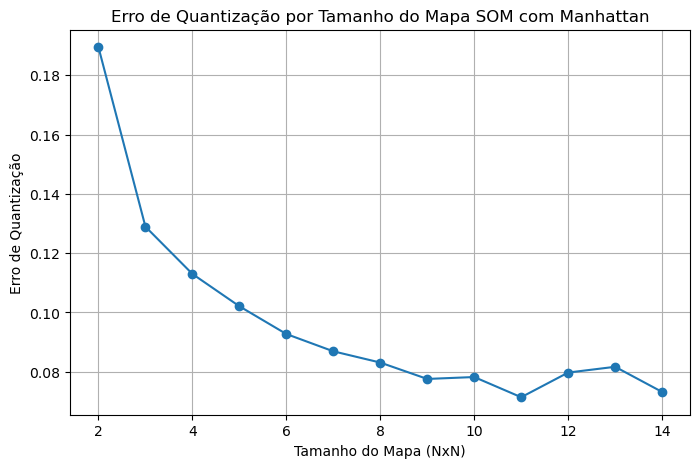

In [68]:
# Checando o erro de quantização

plt.figure(figsize=(8, 5))
plt.plot(sizes, erro, marker='o')
plt.title("Erro de Quantização por Tamanho do Mapa SOM com Manhattan")
plt.xlabel("Tamanho do Mapa (NxN)")
plt.ylabel("Erro de Quantização")
plt.grid(True)
plt.show()

O desempenho com a distância Manhattan não foi tão boa, veremos com Cosseno

### MapaSom com Distância Cosseno

In [71]:
som_cos = MiniSom(x=4, y=4, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='cosine', random_seed=42)
som_cos.train_random(df_normalized_min, num_iteration=5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.11135992593086202


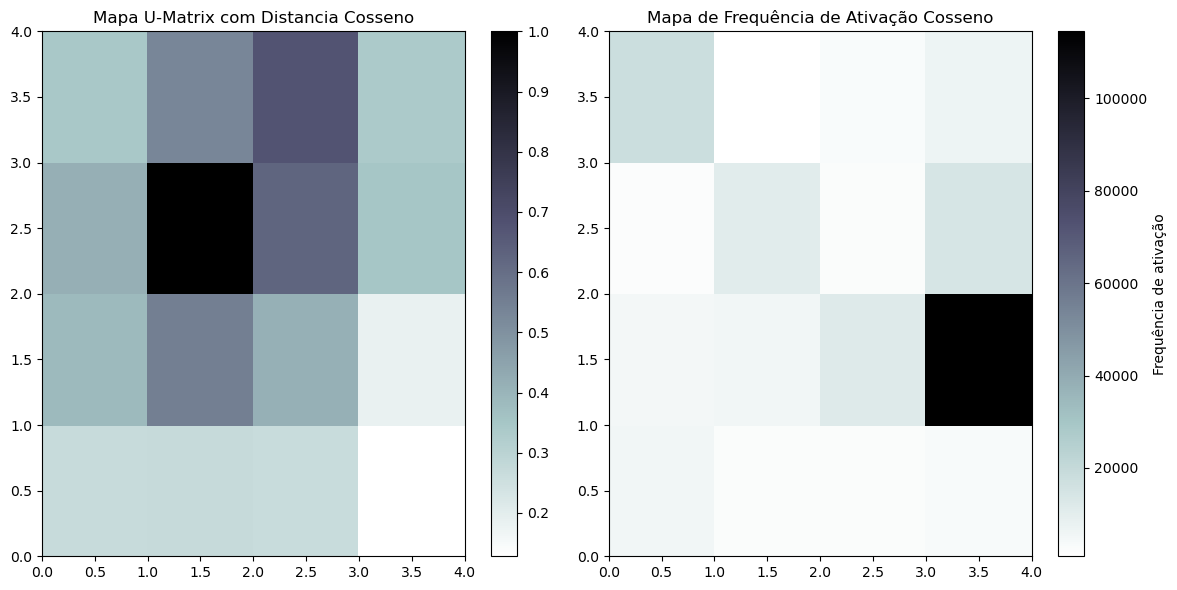

In [72]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som_cos.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix com Distancia Cosseno")

# Mapa de Frequência de Ativação
activation_map = np.zeros((4, 4))
for sample in df_normalized_min:
    winner = som_cos.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação Cosseno')

plt.tight_layout()
plt.show()

#### Testando com outras grades

som_cos 2x2 - Erro de quantização: 0.1875832800730815


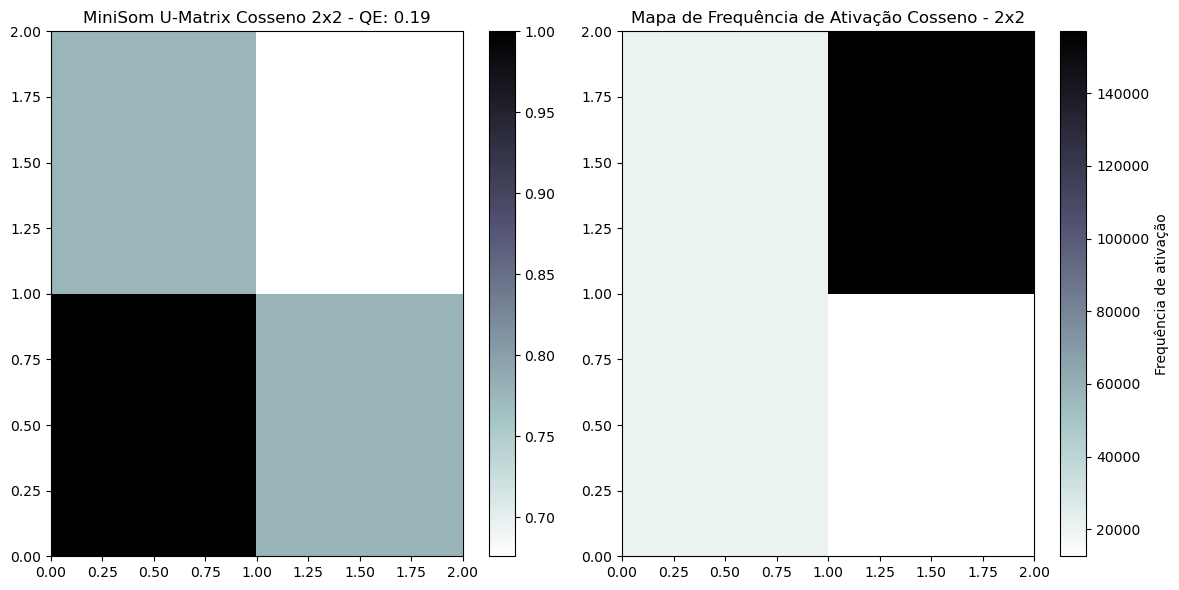

som_cos 3x3 - Erro de quantização: 0.12813858395925626


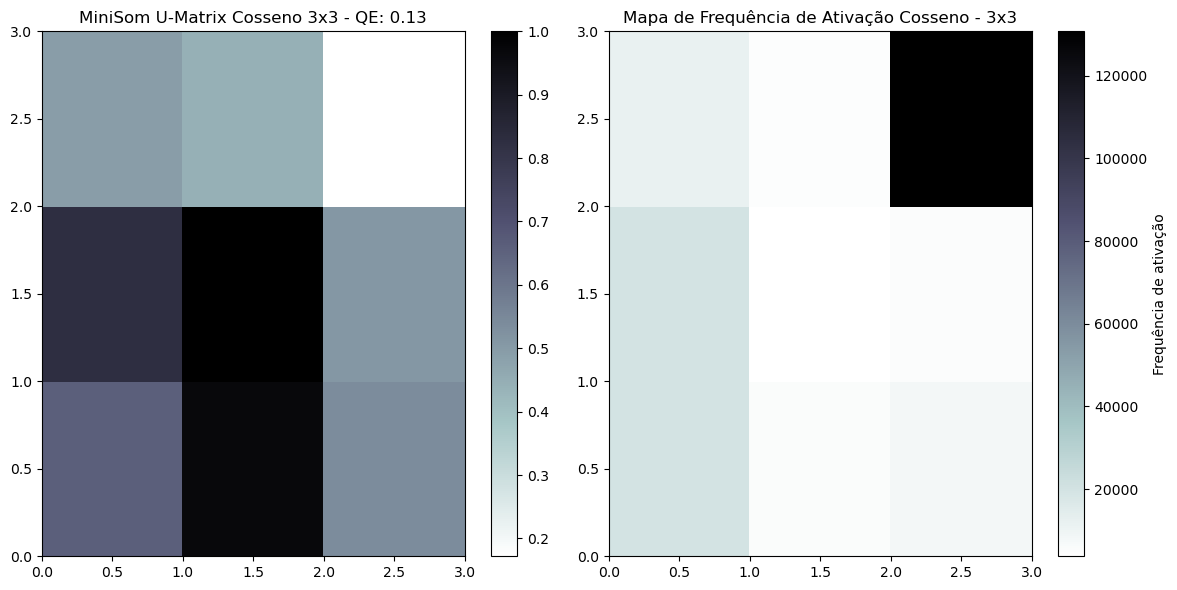

som_cos 4x4 - Erro de quantização: 0.11135992593086202


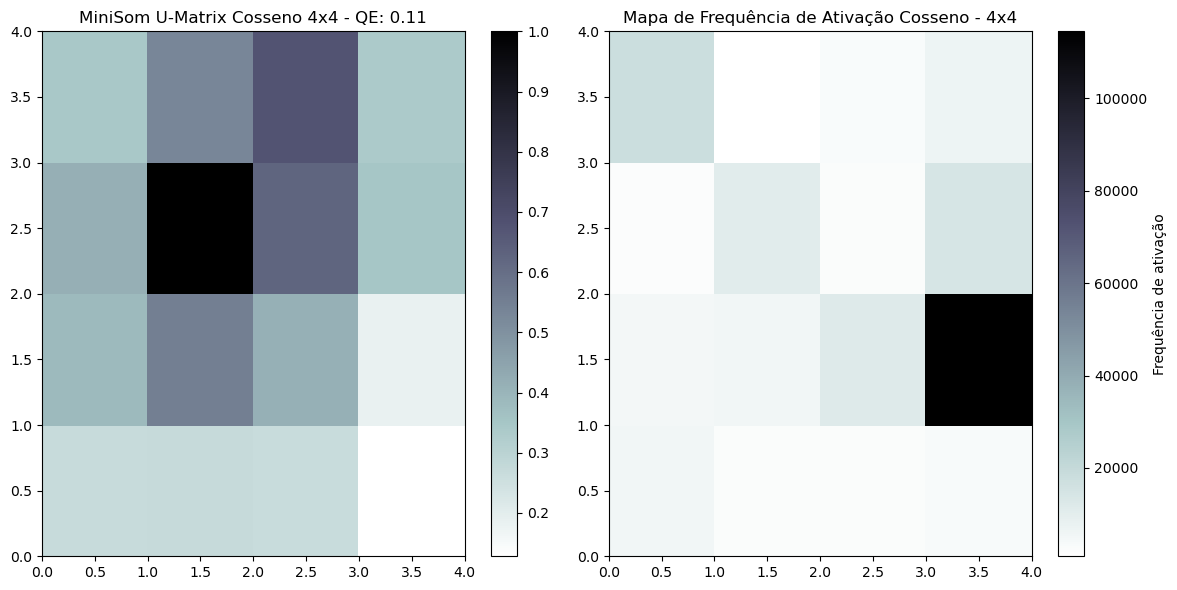

som_cos 5x5 - Erro de quantização: 0.09457851999532482


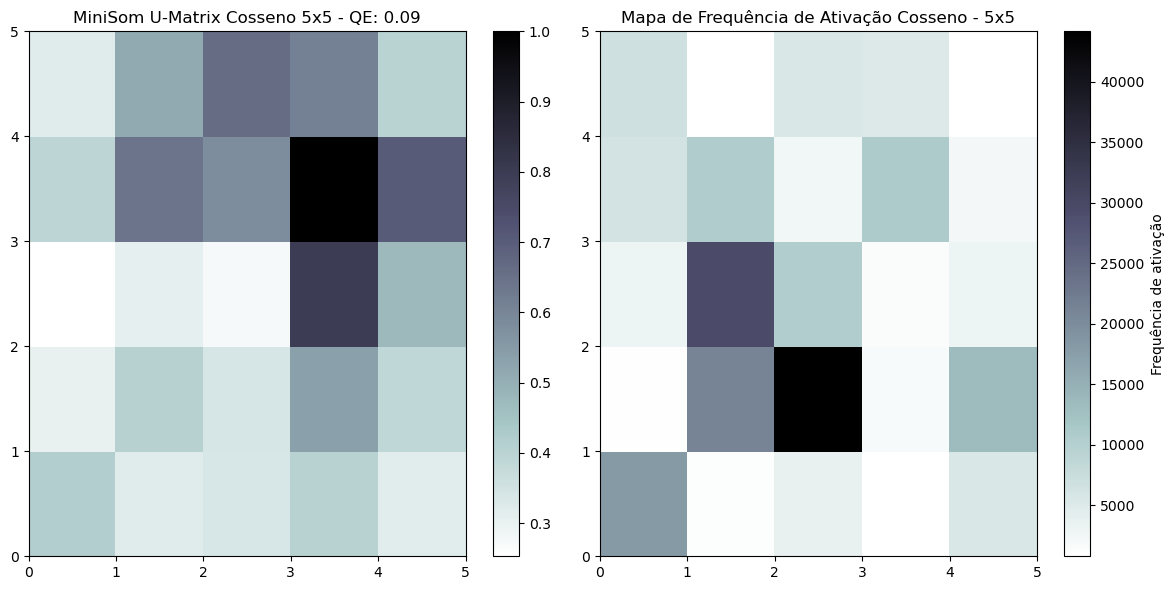

som_cos 6x6 - Erro de quantização: 0.08658706895706642


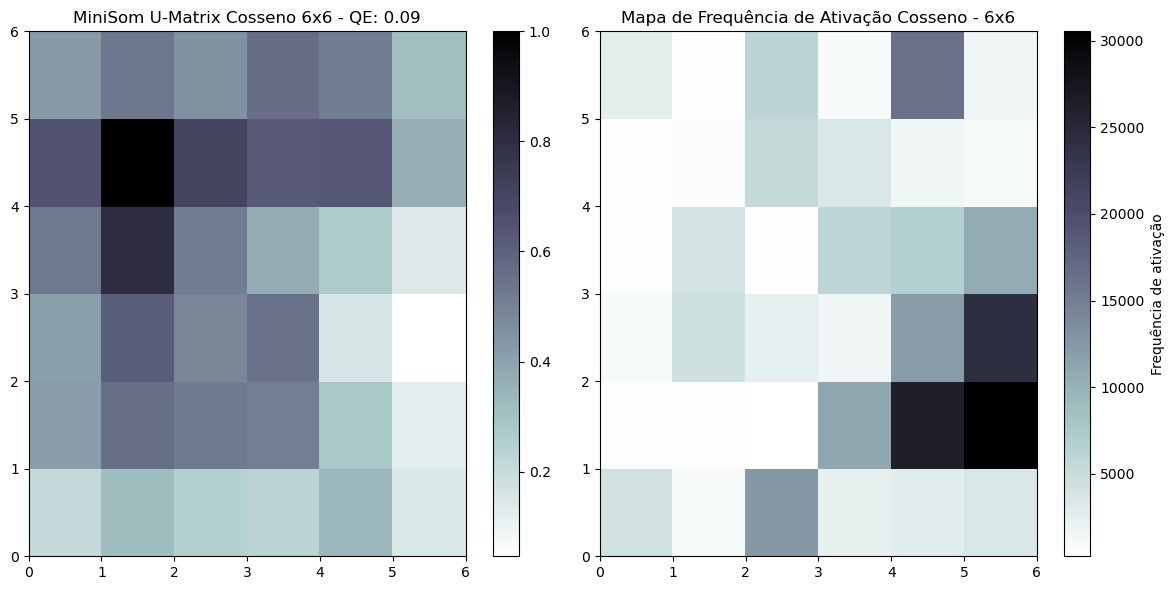

som_cos 7x7 - Erro de quantização: 0.0766107458695881


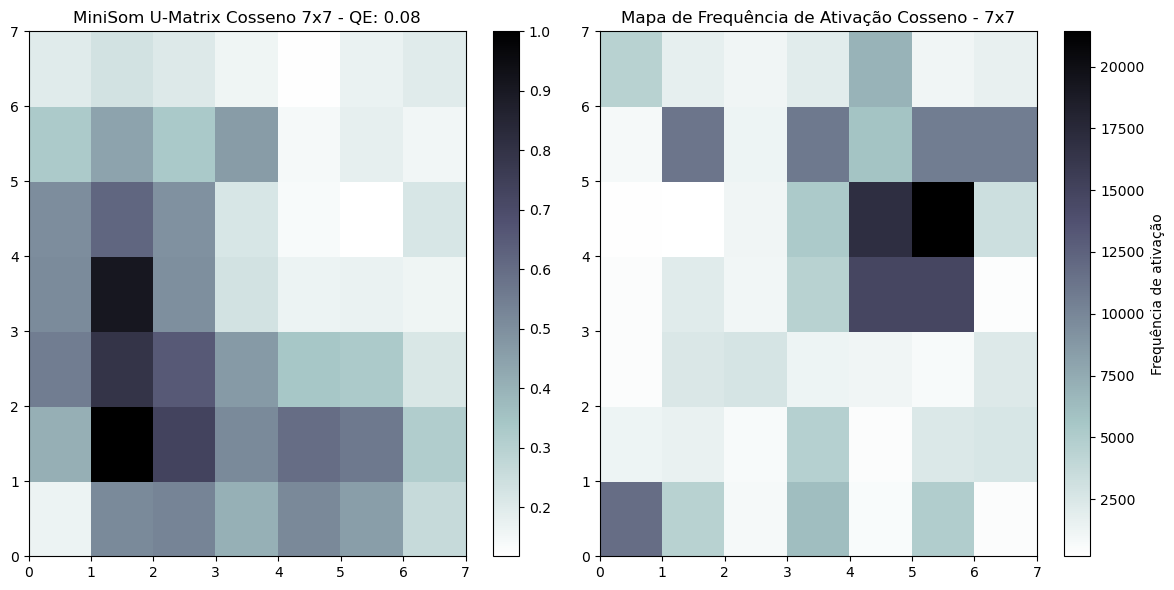

som_cos 8x8 - Erro de quantização: 0.06926179496278172


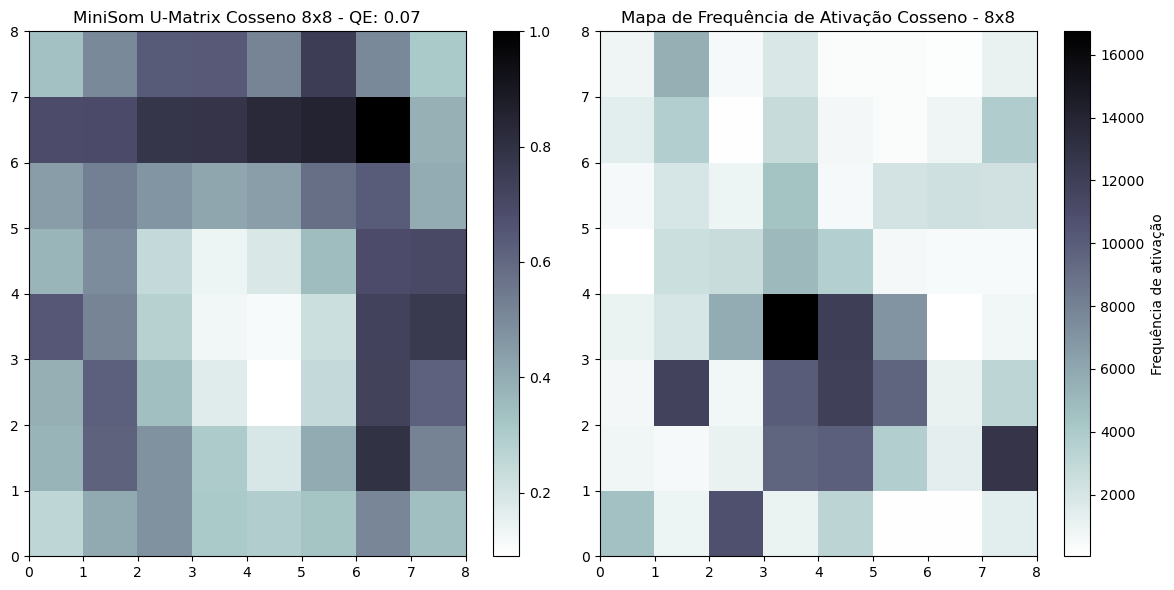

som_cos 9x9 - Erro de quantização: 0.06927769140127597


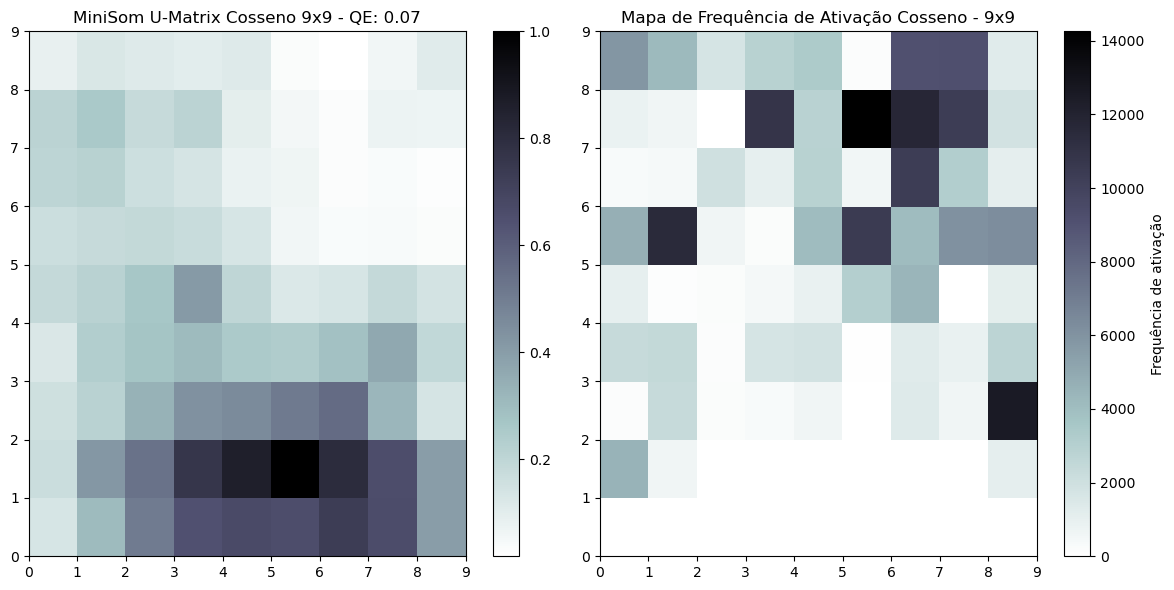

som_cos 10x10 - Erro de quantização: 0.06501891185063084


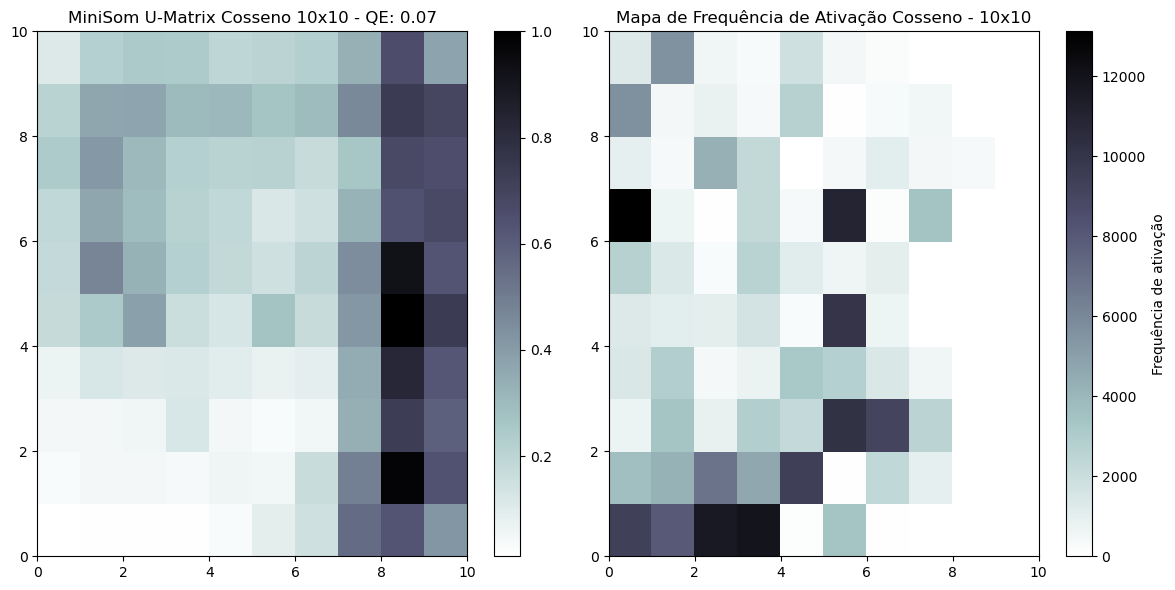

som_cos 11x11 - Erro de quantização: 0.060837192199258296


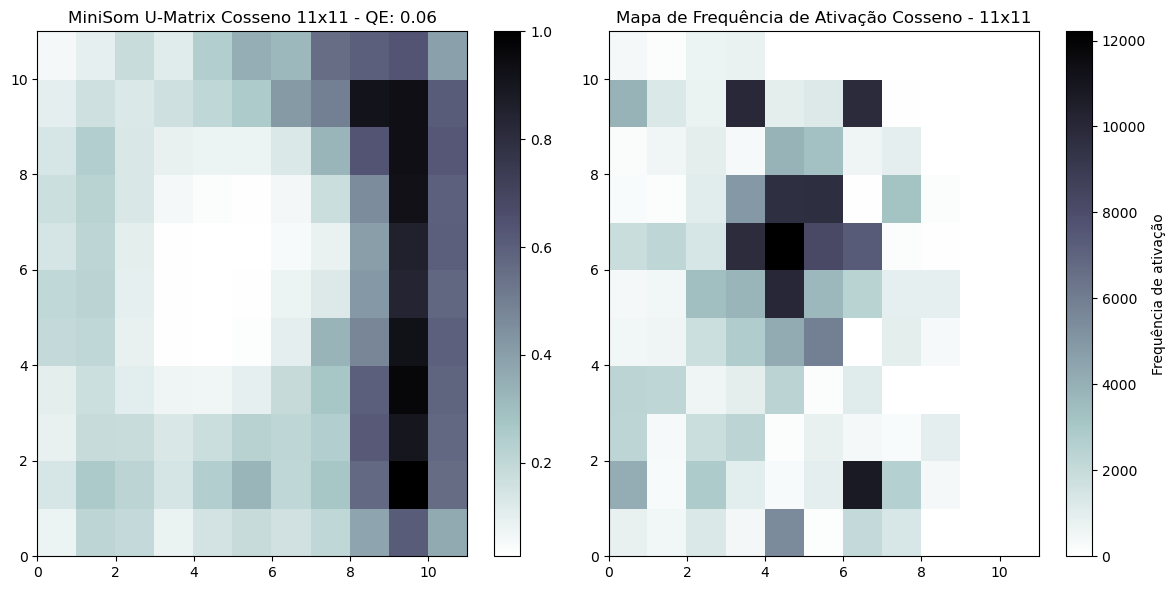

som_cos 12x12 - Erro de quantização: 0.06222934924616039


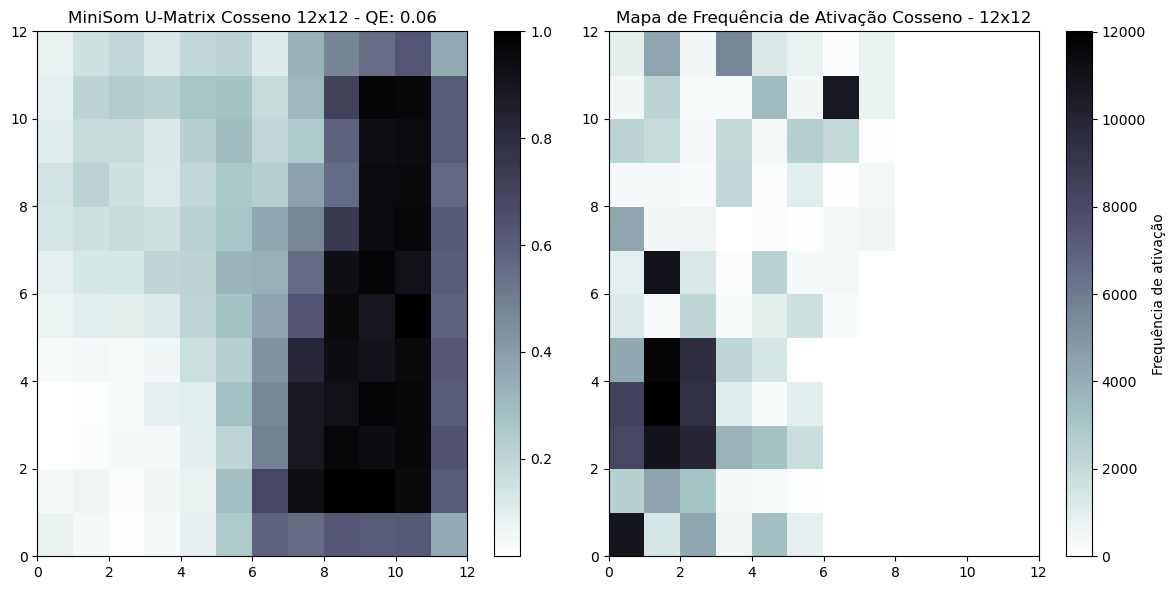

som_cos 13x13 - Erro de quantização: 0.05900838934560471


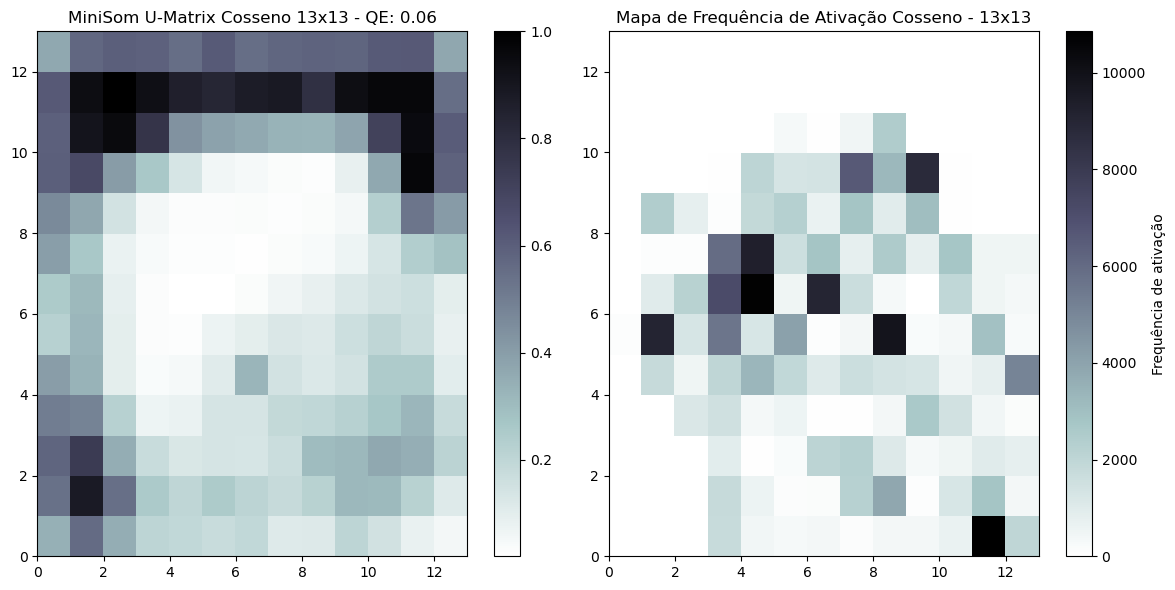

som_cos 14x14 - Erro de quantização: 0.06493505384725028


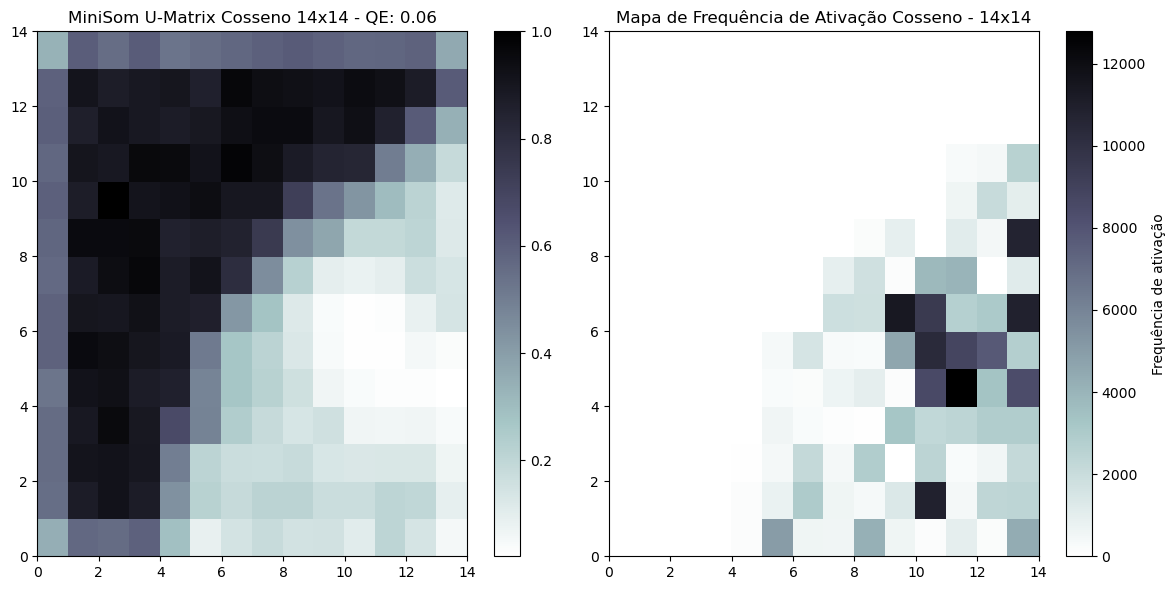

In [74]:
erro = []
sizes = []

for i in range(2, 15):
    som_cos = MiniSom(i, i, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='cosine', random_seed=42)
    som_cos.train_random(df_normalized_min, 5000)
    qe = som_cos.quantization_error(df_normalized_min)
    erro.append(qe)
    sizes.append(i)
    print(f"som_cos {i}x{i} - Erro de quantização: {qe}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Mapa de distância (U-Matrix)
    u_matrix = som_cos.distance_map().T
    grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
    fig.colorbar(grafico1, ax=axes[0])
    axes[0].set_title(f"MiniSom U-Matrix Cosseno {i}x{i} - QE: {round(qe, 2)}")

    # Mapa de Frequência de Ativação
    activation_map = np.zeros((i, i))
    for sample in df_normalized_min:
        winner = som_cos.winner(sample)
        activation_map[winner] += 1

    grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
    fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
    axes[1].set_title(f'Mapa de Frequência de Ativação Cosseno - {i}x{i}')

    plt.tight_layout()
    plt.show()

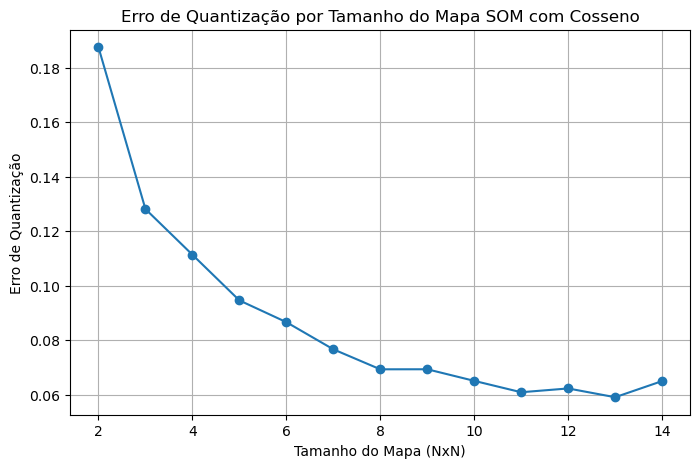

In [75]:
# Checando o erro de quantização

plt.figure(figsize=(8, 5))
plt.plot(sizes, erro, marker='o')
plt.title("Erro de Quantização por Tamanho do Mapa SOM com Cosseno")
plt.xlabel("Tamanho do Mapa (NxN)")
plt.ylabel("Erro de Quantização")
plt.grid(True)
plt.show()

### MapaSom com 6x6, learning rate com 0.5:

In [77]:
som_cos = MiniSom(6, 6, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='cosine', random_seed=42)
som_cos.train_random(df_normalized_min, 5000)

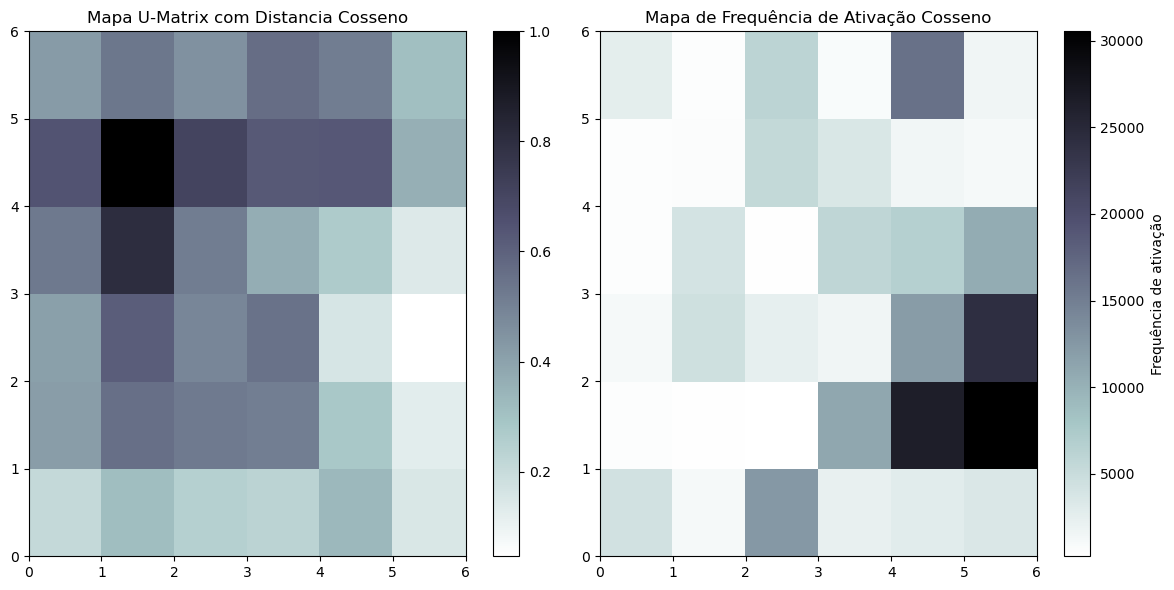

In [78]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som_cos.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix com Distancia Cosseno")

# Mapa de Frequência de Ativação
activation_map = np.zeros((6, 6))
for sample in df_normalized_min:
    winner = som_cos.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação Cosseno')

plt.tight_layout()
plt.show()

### Sobrepondo com piecharts

In [80]:
# Colors for different features
from matplotlib.patches import Patch

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'brown',
    'lime', 'pink', 'teal', 'gold', 'black', 'gray', 'navy', 'olive', 'coral',
    'orchid', 'salmon', 'aqua', 'maroon', 'deepskyblue', 'darkviolet', 'chocolate',
    'chartreuse', 'mediumslateblue']
labels = [f'{col}' for col in df_training.columns]

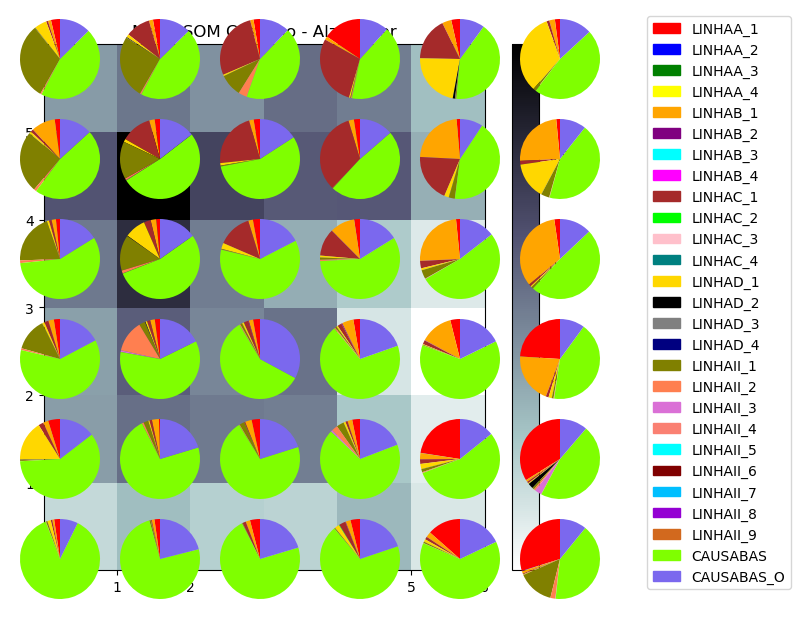

In [81]:
som_cos_size = (6,6)

weights = som_cos.get_weights()

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# U-Matrix
u_matrix = som_cos.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')  
plt.colorbar()
plt.title("Mapa SOM Cosseno - Alzheimer")
plt.tight_layout()

# Overlay pie charts
for i in range(som_cos_size[0]):
    for j in range(som_cos_size[1]):
        neuron_weights = weights[i, j]  

        # Zera valores negativos
        neuron_weights = np.clip(neuron_weights, a_min=0, a_max=None)

        # Pula neurônios vazios
        if neuron_weights.sum() == 0:
            continue
        
        
        neuron_weights = neuron_weights / np.sum(neuron_weights)  # Normalize
        
        # Get position for pie chart
        x, y = j, i  # Transpose to match image coordinates
        
        # Plot pie chart
        pie_ax = plt.axes([x/som_cos_size[1], 1-(y+1)/som_cos_size[0], 1/som_cos_size[1], 1/som_cos_size[0]])
        pie_ax.pie(neuron_weights, colors=colors, startangle=90)
        pie_ax.set_xticks([])  
        pie_ax.set_yticks([])  

# Legenda
patches = [Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
fig.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### MapaSom com 7x7, learning rate com 0.5:

In [83]:
som_cos = MiniSom(x=7, y=7, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='cosine', random_seed=42)
som_cos.train_random(df_normalized_min, num_iteration=5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.0766107458695881


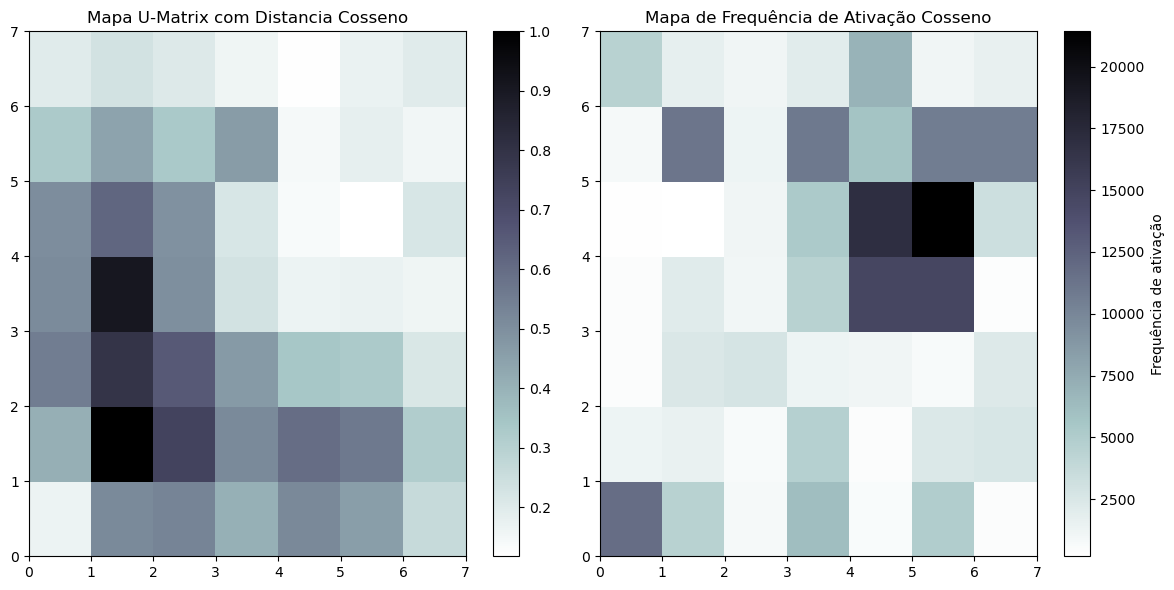

In [84]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som_cos.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix com Distancia Cosseno")

# Mapa de Frequência de Ativação
activation_map = np.zeros((7, 7))
for sample in df_normalized_min:
    winner = som_cos.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação Cosseno')

plt.tight_layout()
plt.show()

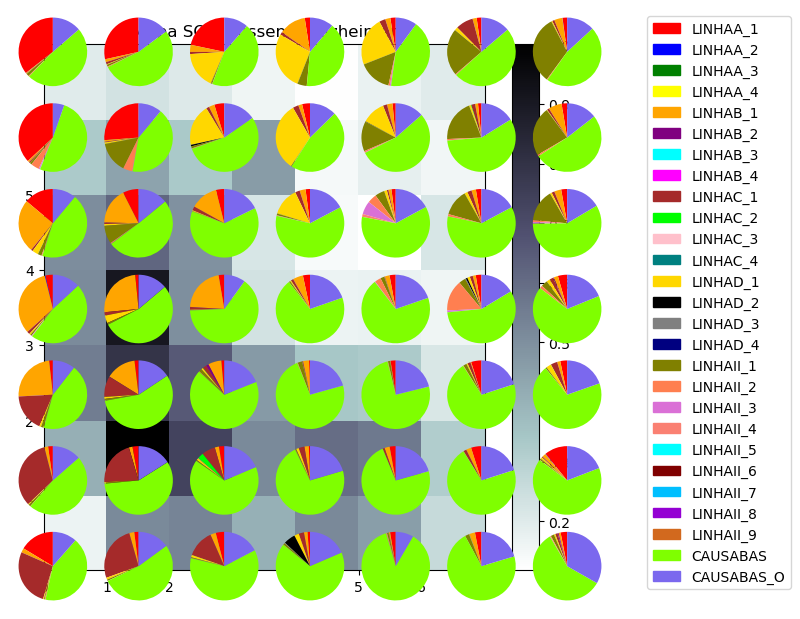

In [85]:
som_cos_size = (7,7)

weights = som_cos.get_weights()

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# U-Matrix
u_matrix = som_cos.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')  
plt.colorbar()
plt.title("Mapa SOM Cosseno - Alzheimer")
plt.tight_layout()

# Overlay pie charts
for i in range(som_cos_size[0]):
    for j in range(som_cos_size[1]):
        neuron_weights = weights[i, j]  

        # Zera valores negativos
        neuron_weights = np.clip(neuron_weights, a_min=0, a_max=None)

        # Pula neurônios vazios
        if neuron_weights.sum() == 0:
            continue
        
        neuron_weights = neuron_weights / np.sum(neuron_weights)  # Normalize
        
        # Get position for pie chart
        x, y = j, i  # Transpose to match image coordinates
        
        # Plot pie chart
        pie_ax = plt.axes([x/som_cos_size[1], 1-(y+1)/som_cos_size[0], 1/som_cos_size[1], 1/som_cos_size[0]])
        pie_ax.pie(neuron_weights, colors=colors, startangle=90)
        pie_ax.set_xticks([])  
        pie_ax.set_yticks([])  

# Legenda
patches = [Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
fig.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Comparando as distâncias Manhattan e Cosseno, o QE da distância Cosseno está menor, indicando que o desempenho com essa distância pode ser mais satisfatória para o estudo

## Testando com outros hiperparâmetros 

### Aumentando a iteração para 50000

MiniSom 2x2 - Erro de quantização: 0.16987062626209248


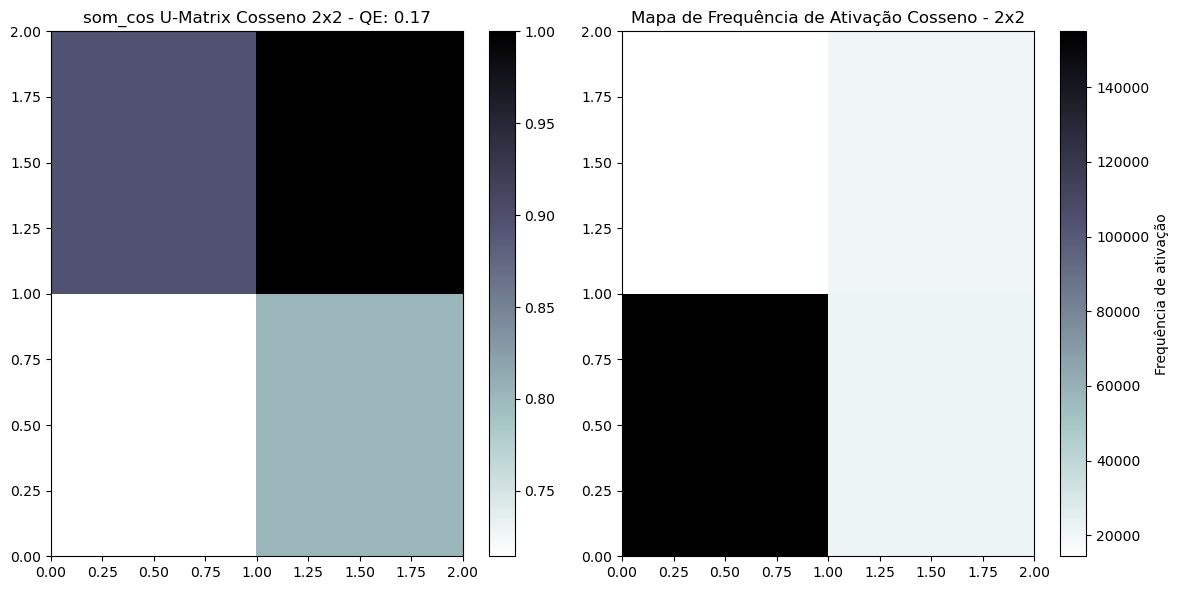

MiniSom 3x3 - Erro de quantização: 0.12378084228945445


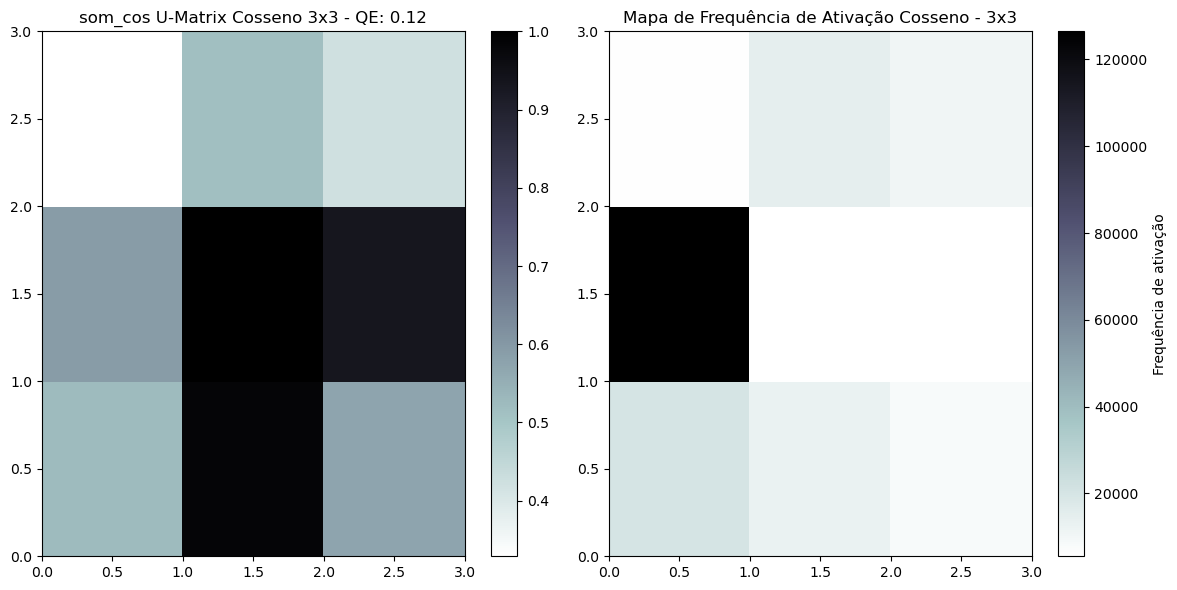

MiniSom 4x4 - Erro de quantização: 0.10202823977252198


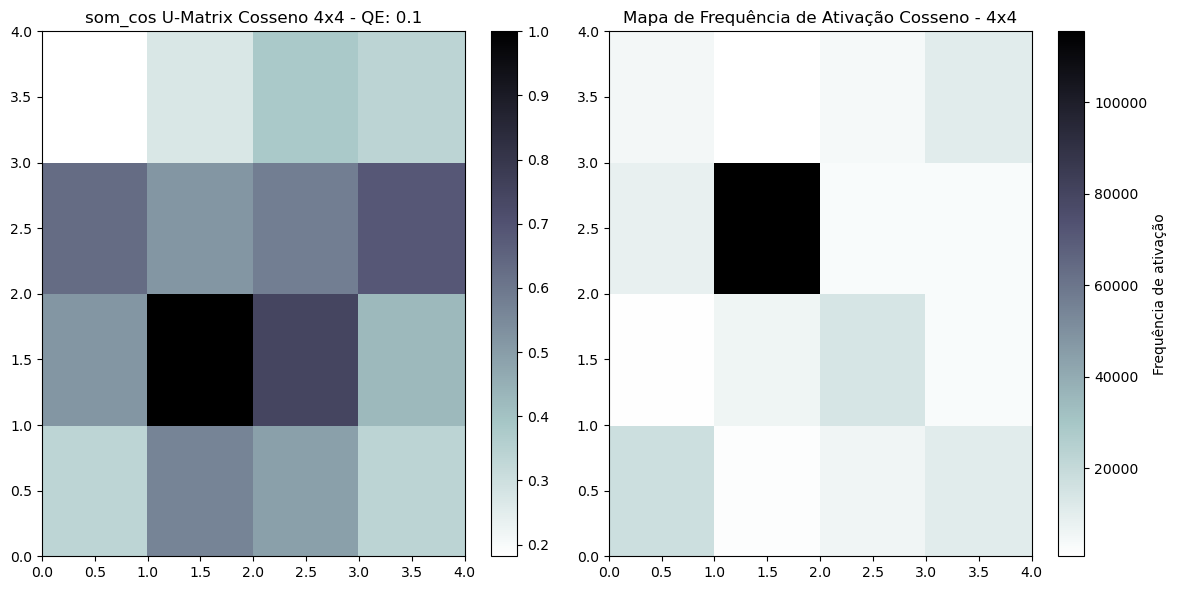

MiniSom 5x5 - Erro de quantização: 0.08985565368685941


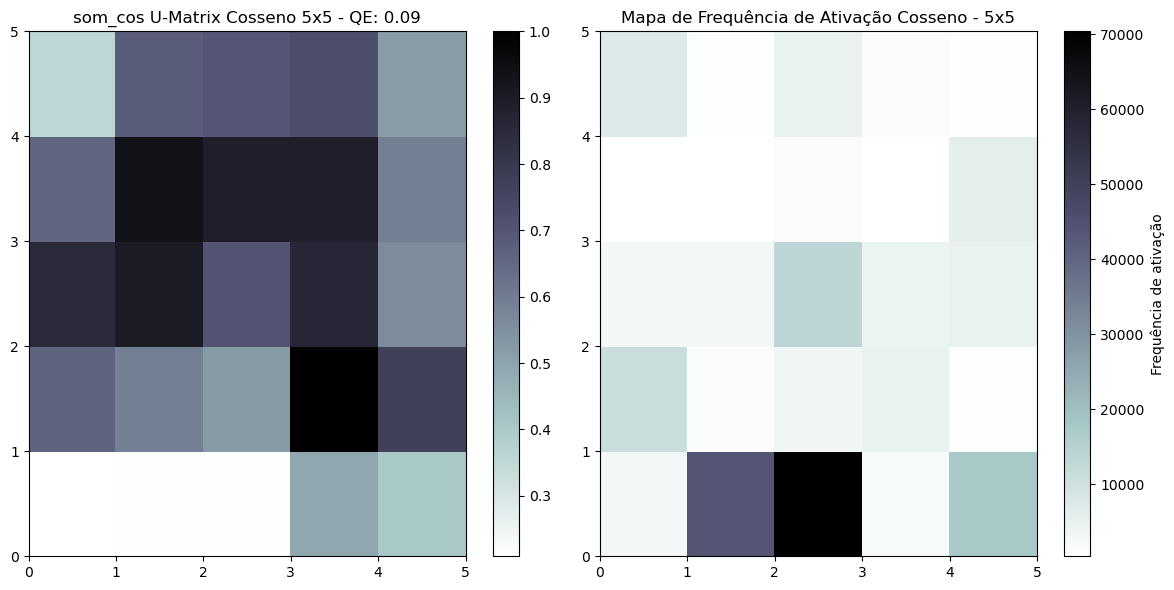

MiniSom 6x6 - Erro de quantização: 0.08237175066457086


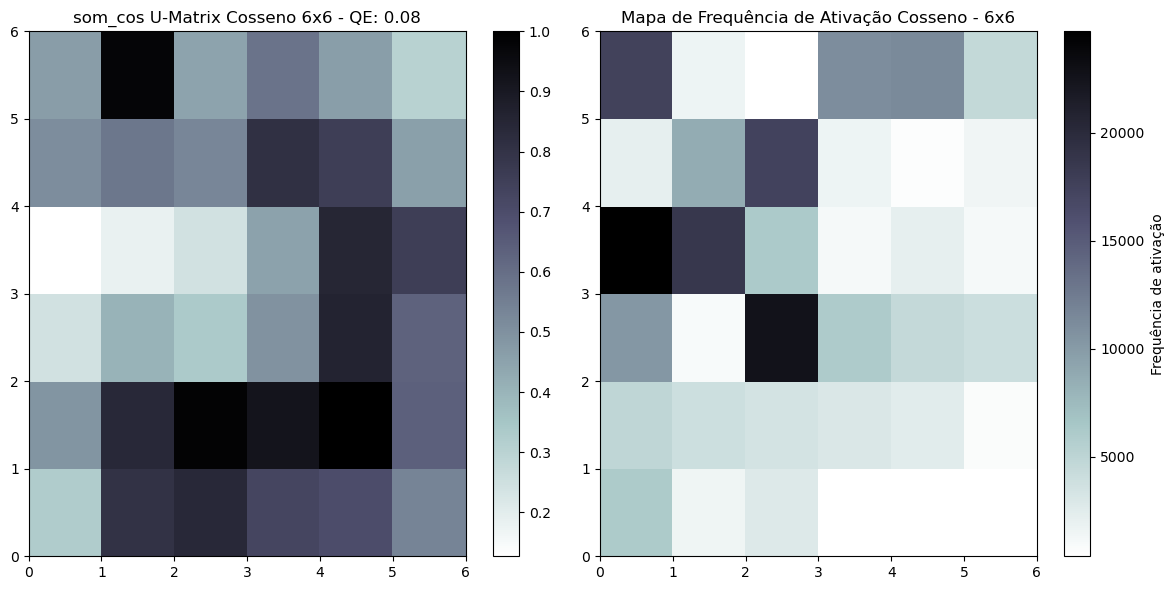

MiniSom 7x7 - Erro de quantização: 0.07062186789337402


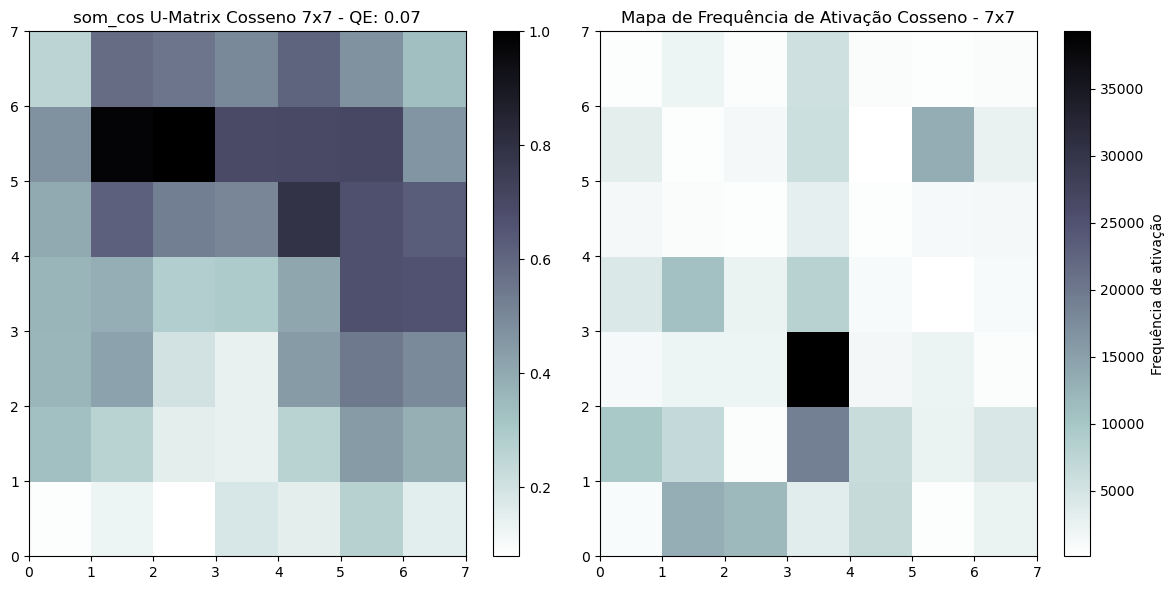

MiniSom 8x8 - Erro de quantização: 0.06152997029972734


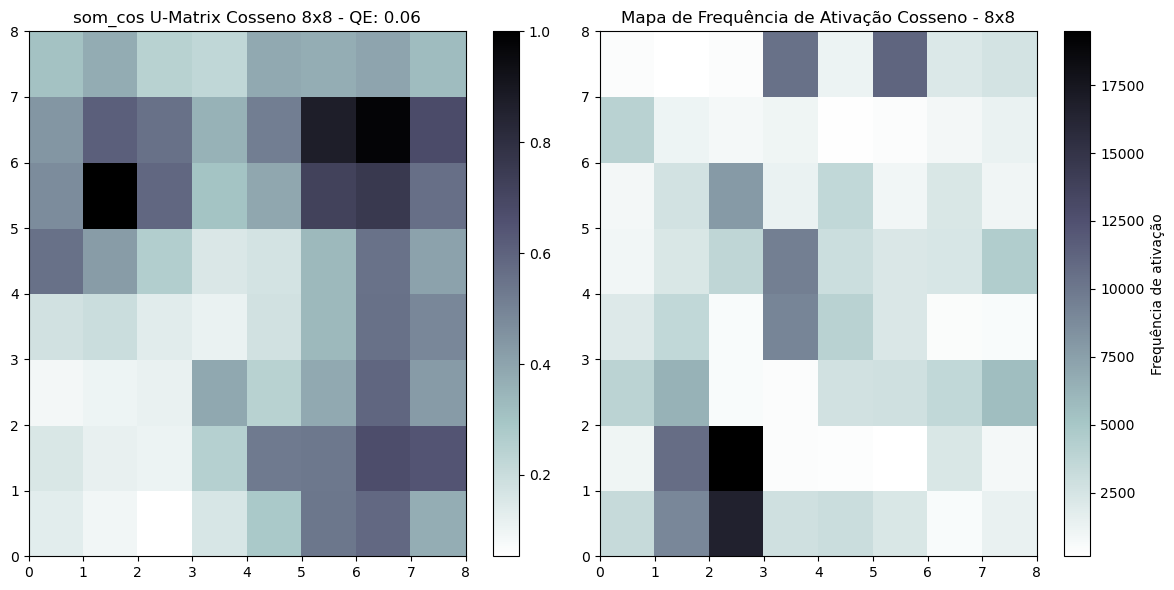

MiniSom 9x9 - Erro de quantização: 0.05541444872642542


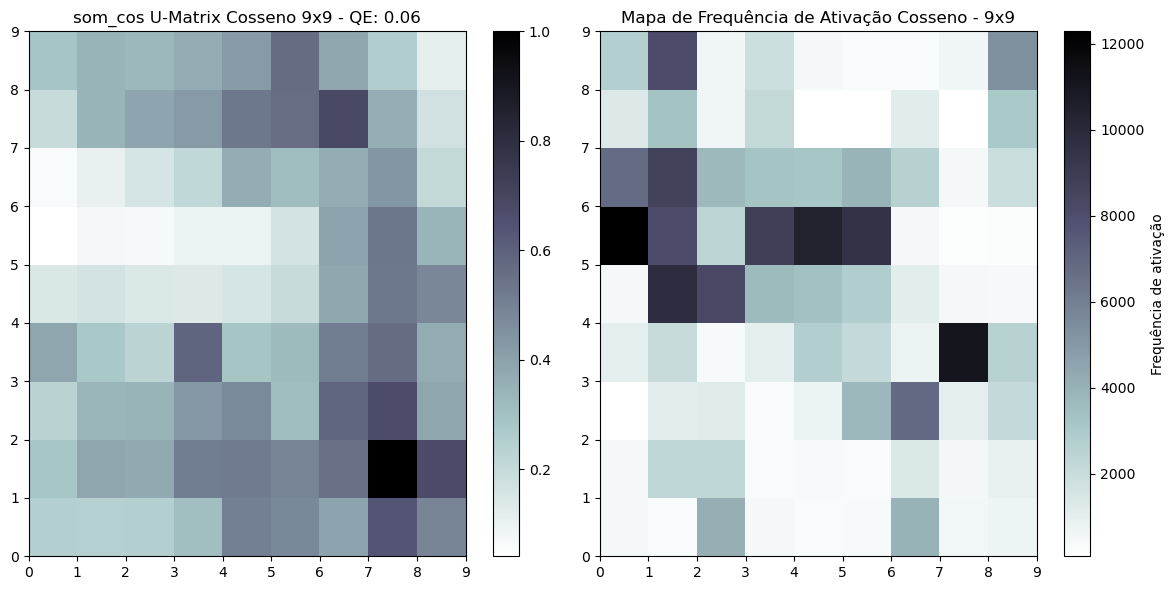

MiniSom 10x10 - Erro de quantização: 0.05212151436828636


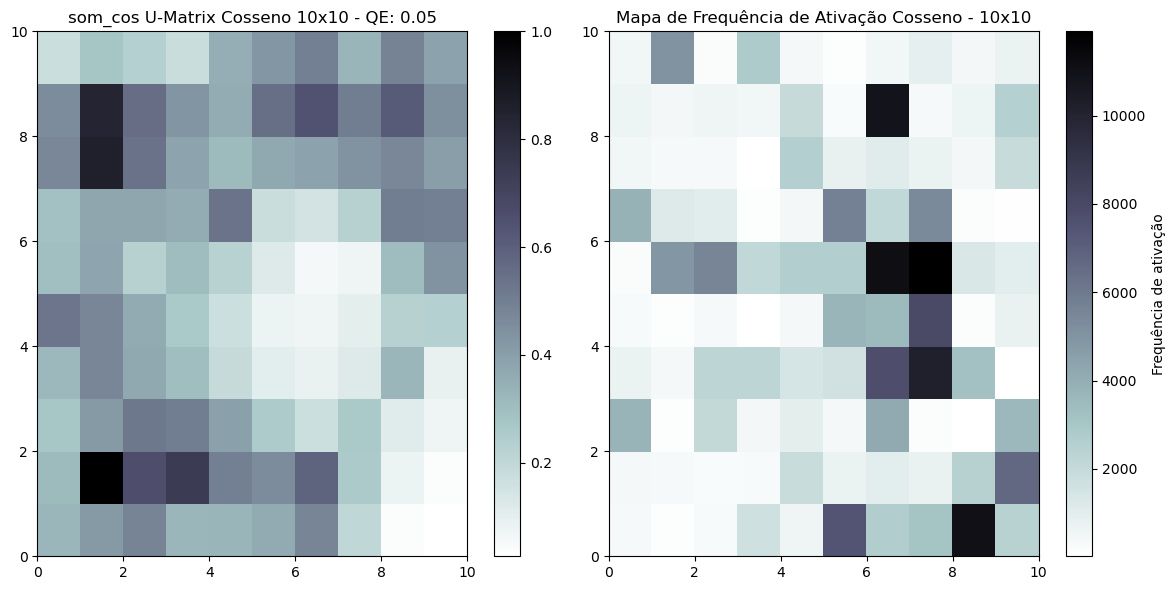

MiniSom 11x11 - Erro de quantização: 0.0489619568566008


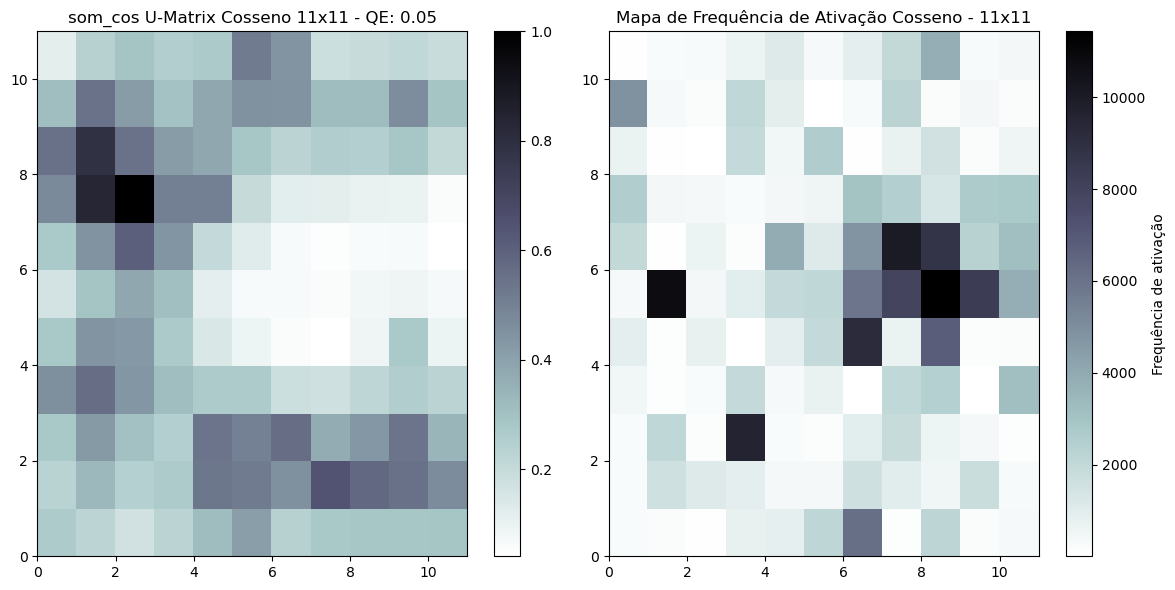

MiniSom 12x12 - Erro de quantização: 0.047238680475015345


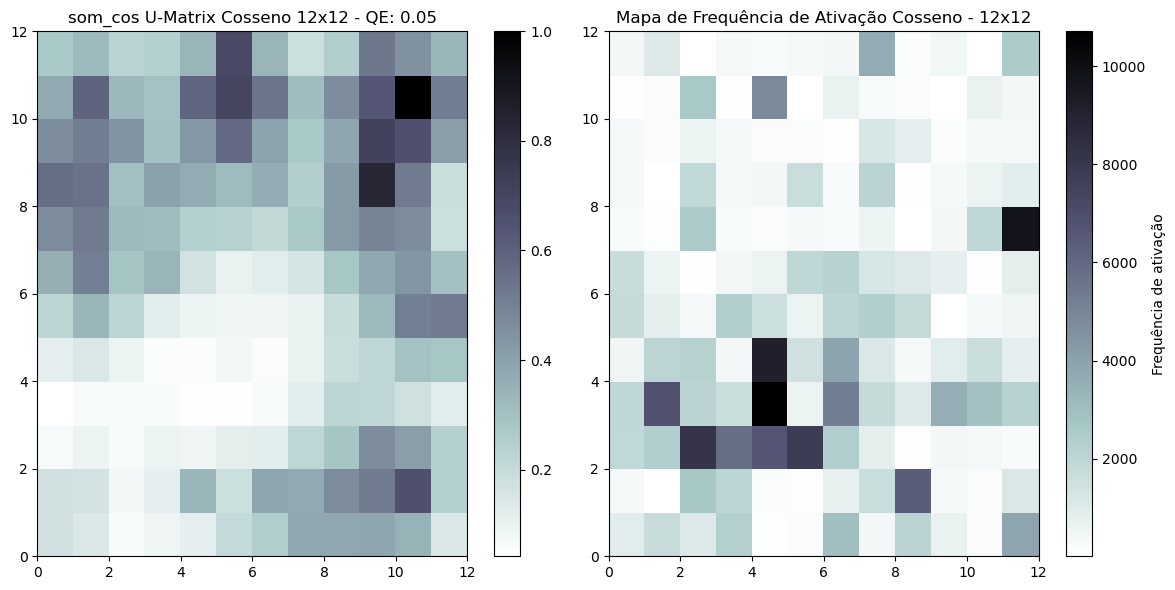

MiniSom 13x13 - Erro de quantização: 0.0449113352829658


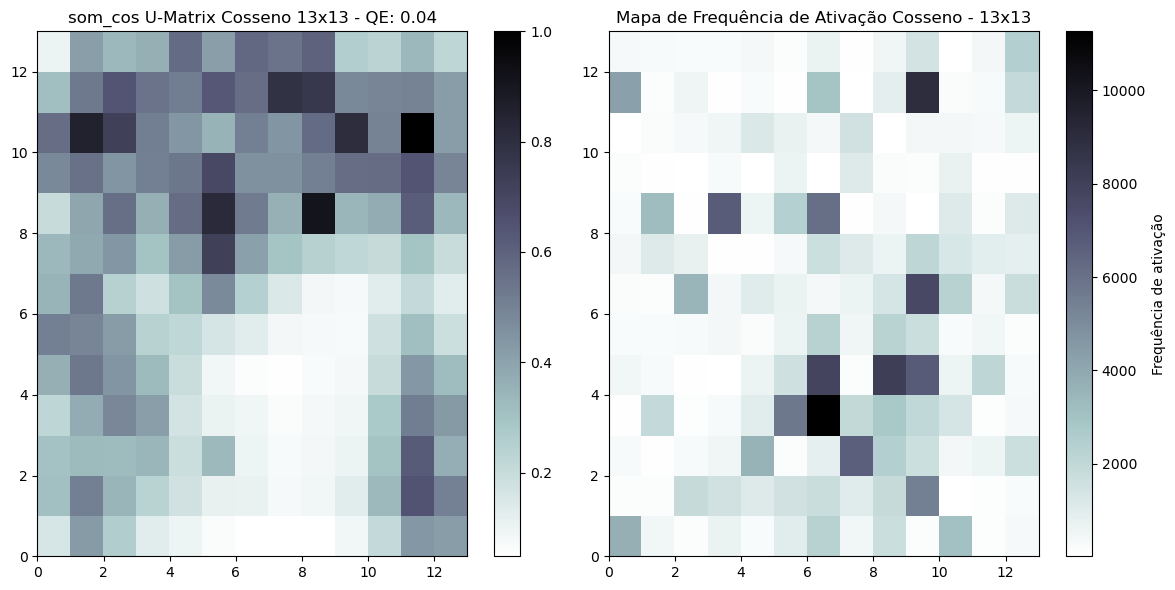

MiniSom 14x14 - Erro de quantização: 0.04156727595343475


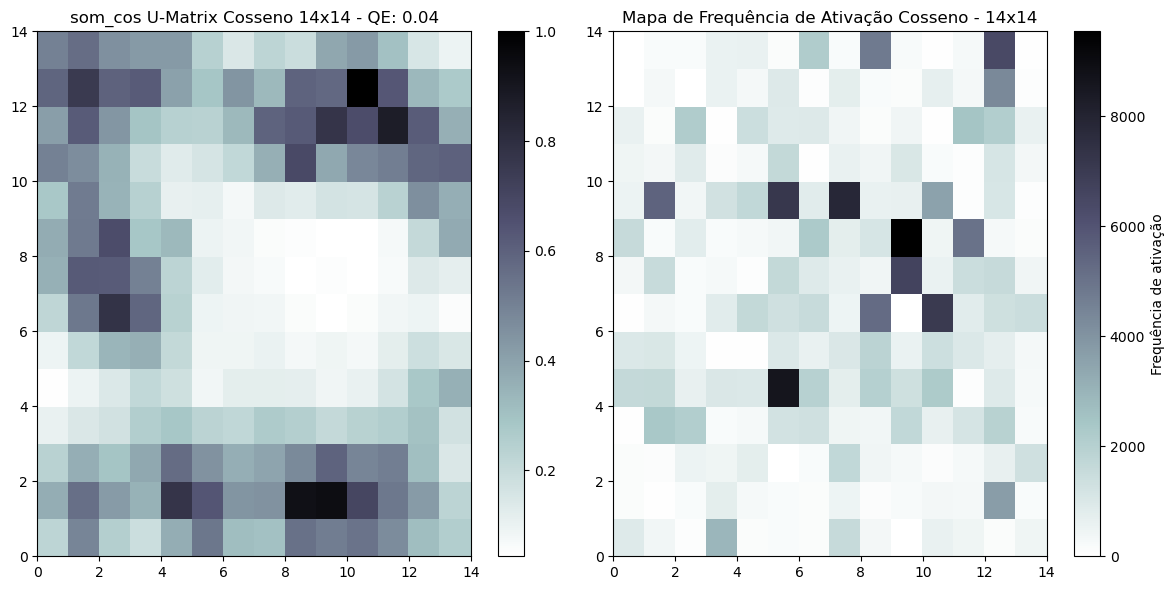

In [89]:
erro = []
sizes = []

for i in range(2, 15):
    som_cos = MiniSom(i, i, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='cosine', random_seed=42)
    som_cos.train_random(df_normalized_min, 50000)
    qe = som_cos.quantization_error(df_normalized_min)
    erro.append(qe)
    sizes.append(i)
    print(f"MiniSom {i}x{i} - Erro de quantização: {qe}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Mapa de distância (U-Matrix)
    u_matrix = som_cos.distance_map().T
    grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
    fig.colorbar(grafico1, ax=axes[0])
    axes[0].set_title(f"som_cos U-Matrix Cosseno {i}x{i} - QE: {round(qe, 2)}")

    # Mapa de Frequência de Ativação
    activation_map = np.zeros((i, i))
    for sample in df_normalized_min:
        winner = som_cos.winner(sample)
        activation_map[winner] += 1

    grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
    fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
    axes[1].set_title(f'Mapa de Frequência de Ativação Cosseno - {i}x{i}')

    plt.tight_layout()
    plt.show()

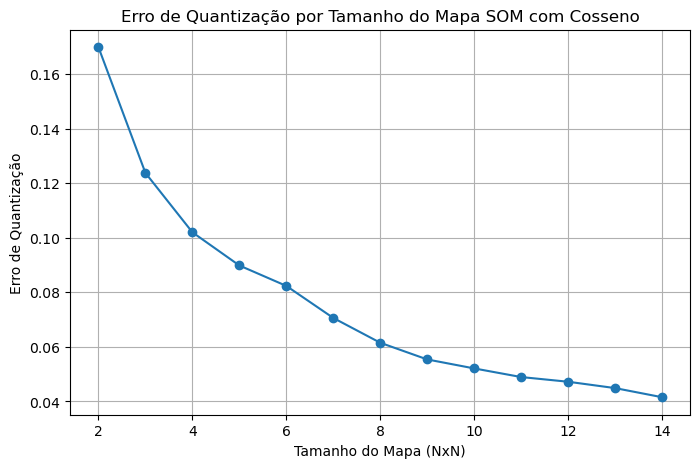

In [90]:
# Checando o erro de quantização

plt.figure(figsize=(8, 5))
plt.plot(sizes, erro, marker='o')
plt.title("Erro de Quantização por Tamanho do Mapa SOM com Cosseno")
plt.xlabel("Tamanho do Mapa (NxN)")
plt.ylabel("Erro de Quantização")
plt.grid(True)
plt.show()

### MapaSom com 7x7, learning rate com 0.5 e iteration 50000:

In [92]:
som_cos = MiniSom(x=7, y=7, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='cosine', random_seed=42)
som_cos.train_random(df_normalized_min, num_iteration=50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.07062186789337402


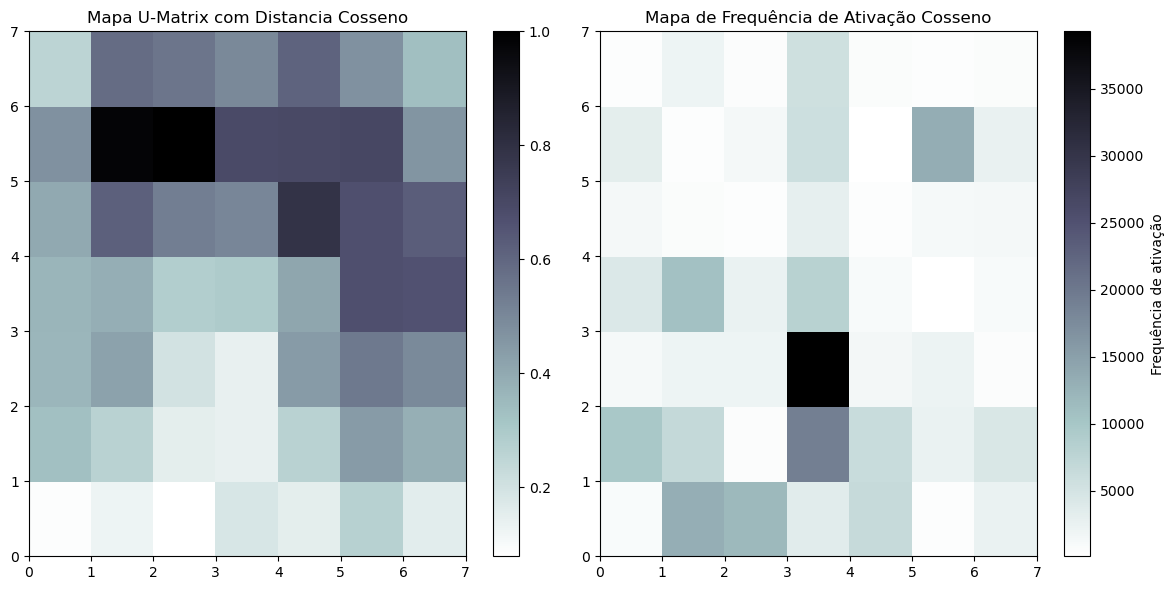

In [93]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som_cos.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix com Distancia Cosseno")

# Mapa de Frequência de Ativação
activation_map = np.zeros((7, 7))
for sample in df_normalized_min:
    winner = som_cos.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação Cosseno')

plt.tight_layout()
plt.show()

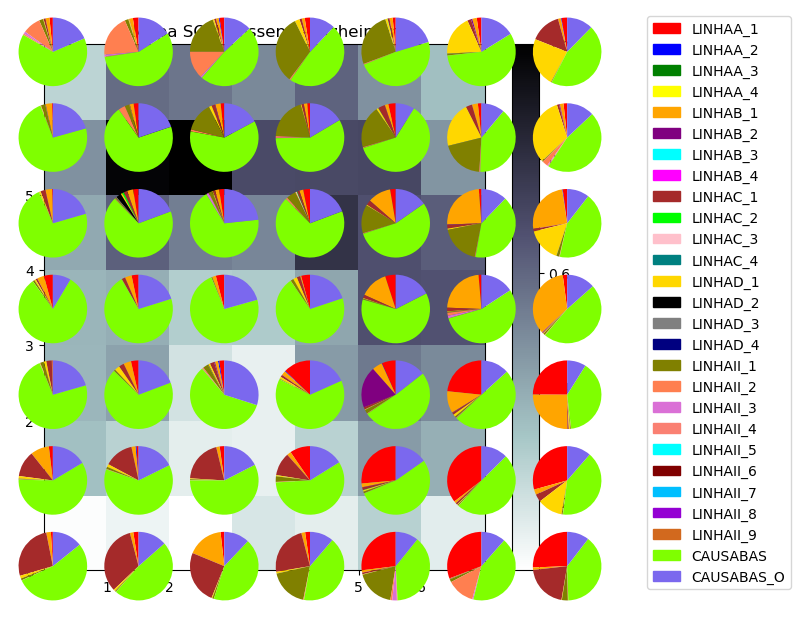

In [94]:
som_cos_size = (7,7)

weights = som_cos.get_weights()

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# U-Matrix
u_matrix = som_cos.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')  
plt.colorbar()
plt.title("Mapa SOM Cosseno - Alzheimer")
plt.tight_layout()

# Overlay pie charts
for i in range(som_cos_size[0]):
    for j in range(som_cos_size[1]):
        neuron_weights = weights[i, j]  

        # Zera valores negativos
        neuron_weights = np.clip(neuron_weights, a_min=0, a_max=None)

        # Pula neurônios vazios
        if neuron_weights.sum() == 0:
            continue
        
        neuron_weights = neuron_weights / np.sum(neuron_weights)  # Normalize
        
        # Get position for pie chart
        x, y = j, i  # Transpose to match image coordinates
        
        # Plot pie chart
        pie_ax = plt.axes([x/som_cos_size[1], 1-(y+1)/som_cos_size[0], 1/som_cos_size[1], 1/som_cos_size[0]])
        pie_ax.pie(neuron_weights, colors=colors, startangle=90)
        pie_ax.set_xticks([])  
        pie_ax.set_yticks([])  

# Legenda
patches = [Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
fig.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Ajustando o Leraning Rate

som_cos 2x2 - Erro de quantização: 0.1760837804535541


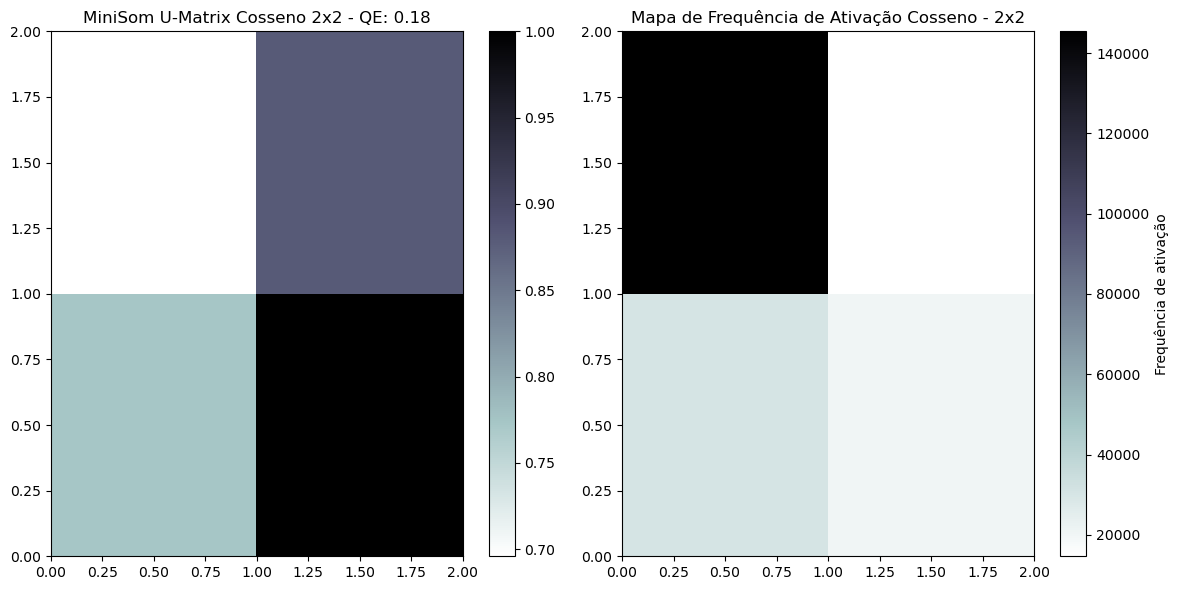

som_cos 3x3 - Erro de quantização: 0.1218193133055847


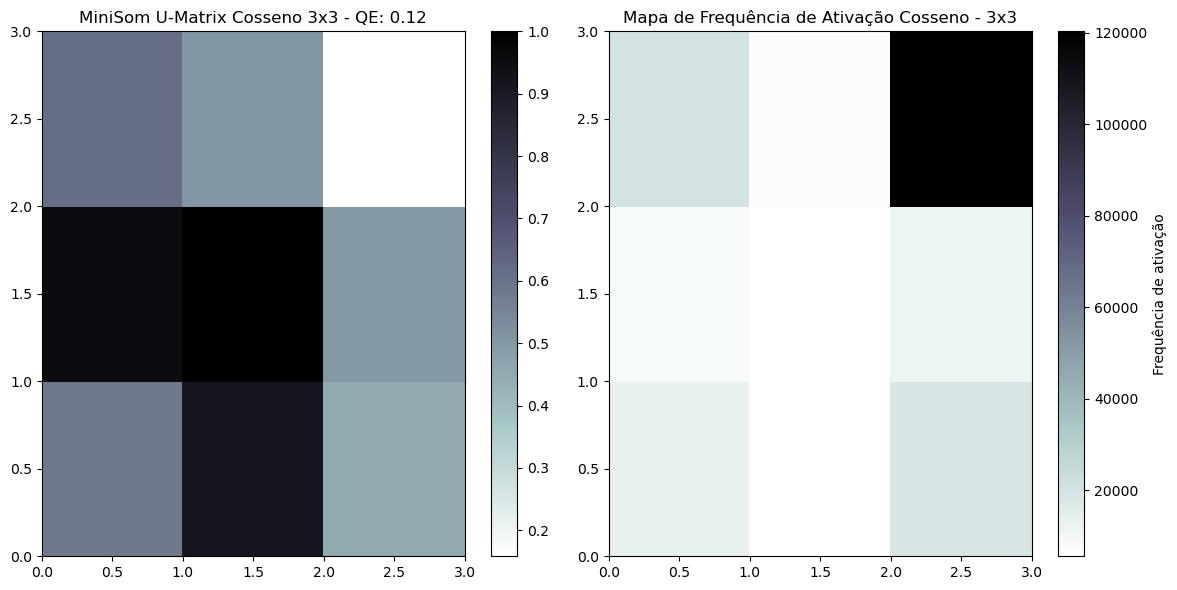

som_cos 4x4 - Erro de quantização: 0.10079578646821585


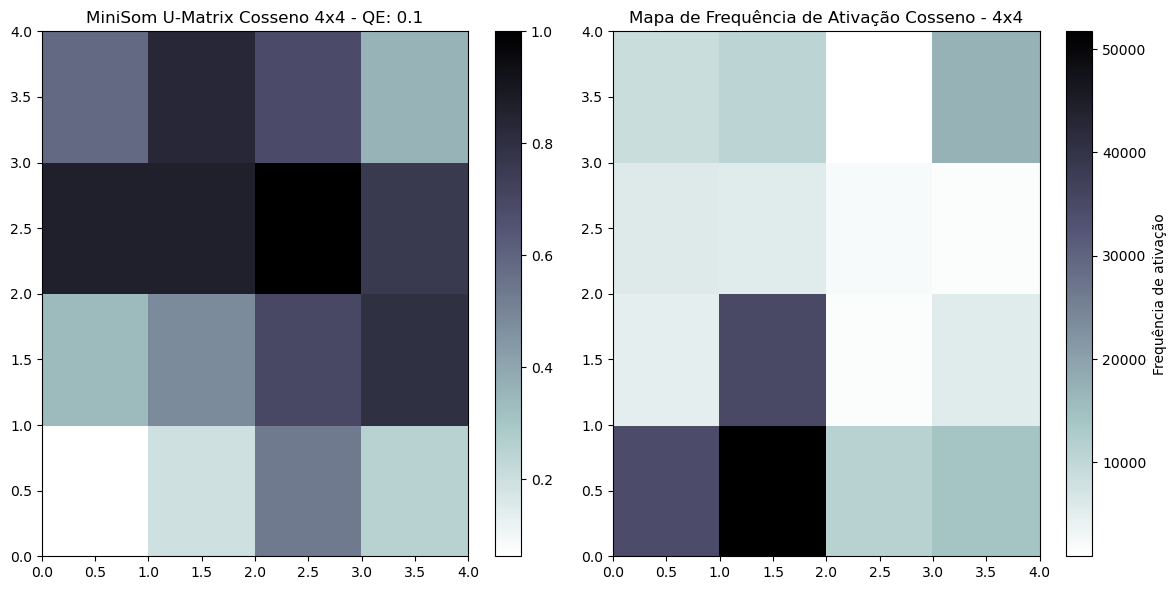

som_cos 5x5 - Erro de quantização: 0.08599410078120379


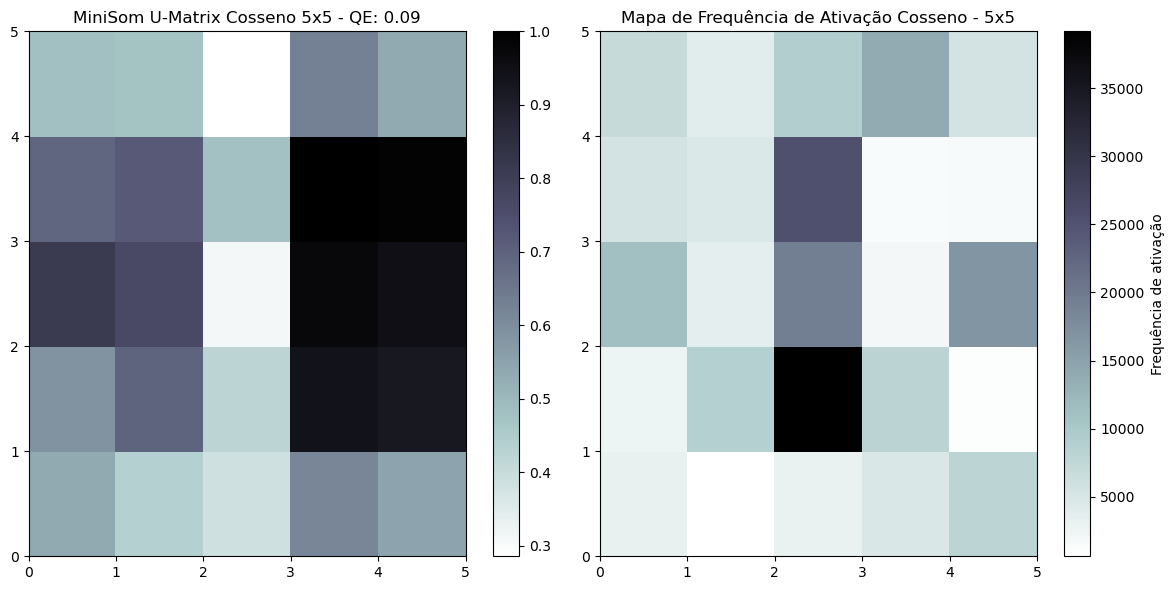

som_cos 6x6 - Erro de quantização: 0.07740579068551819


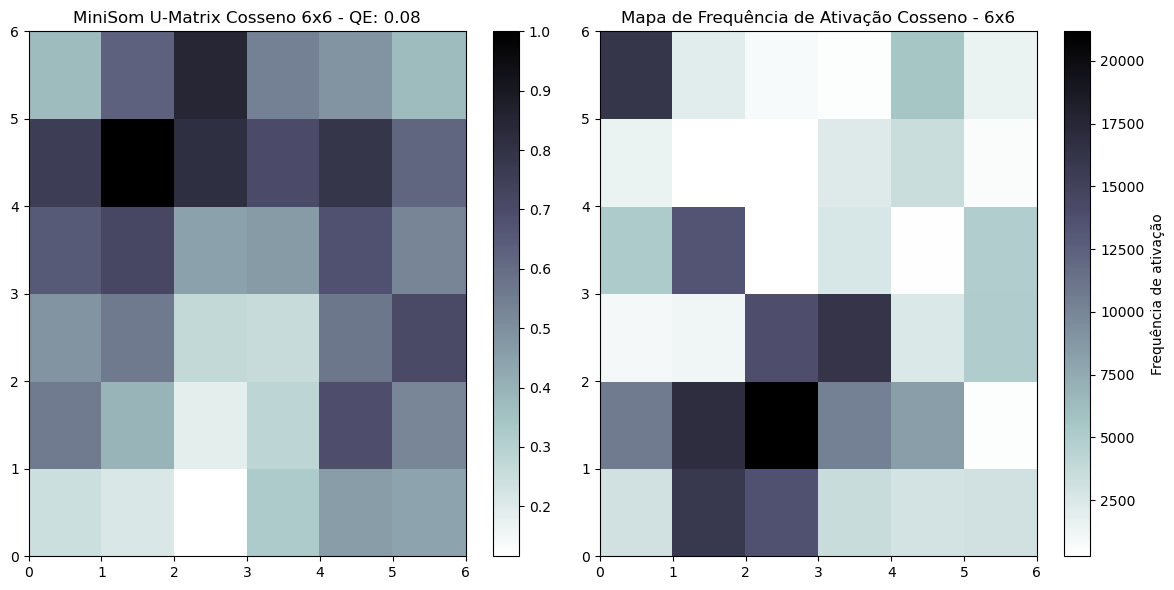

som_cos 7x7 - Erro de quantização: 0.06997119756994216


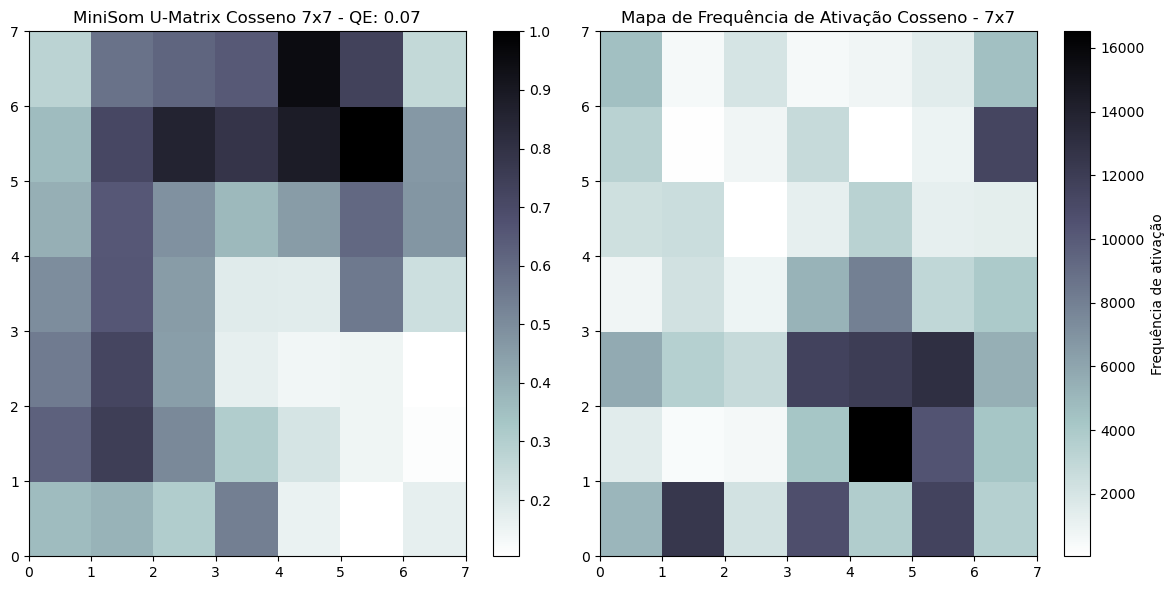

som_cos 8x8 - Erro de quantização: 0.06778603223005239


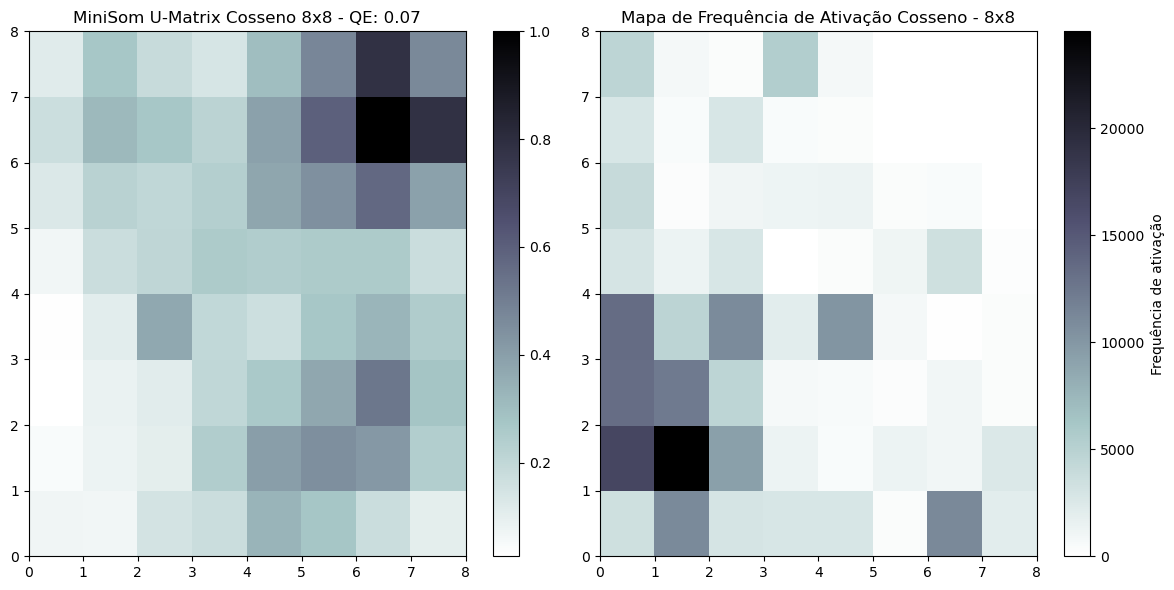

som_cos 9x9 - Erro de quantização: 0.06783881766086801


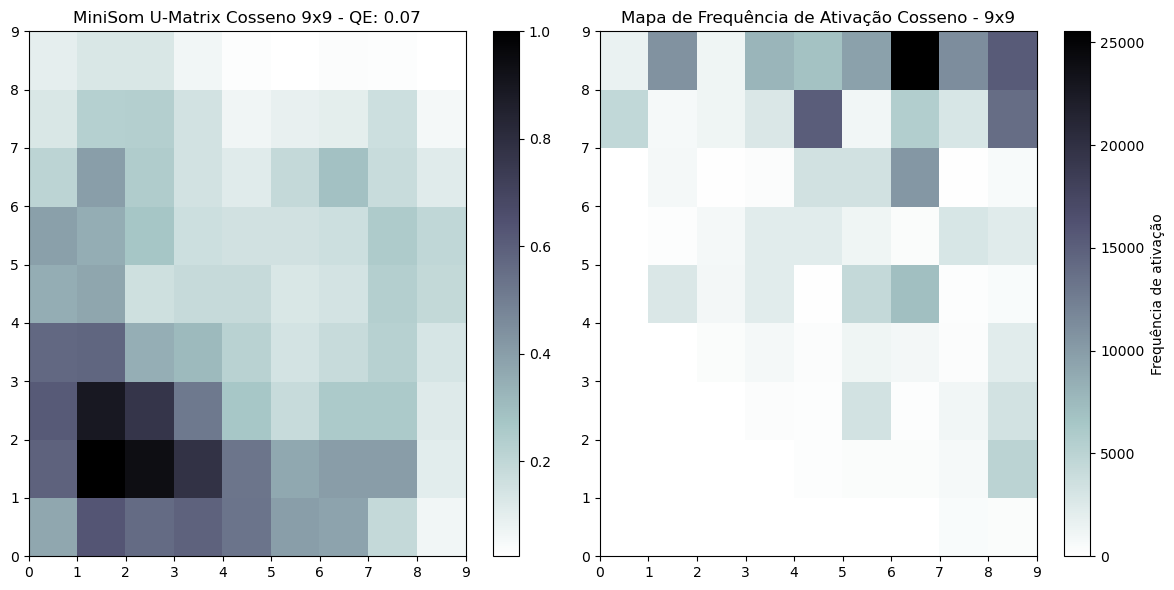

som_cos 10x10 - Erro de quantização: 0.06759748960439985


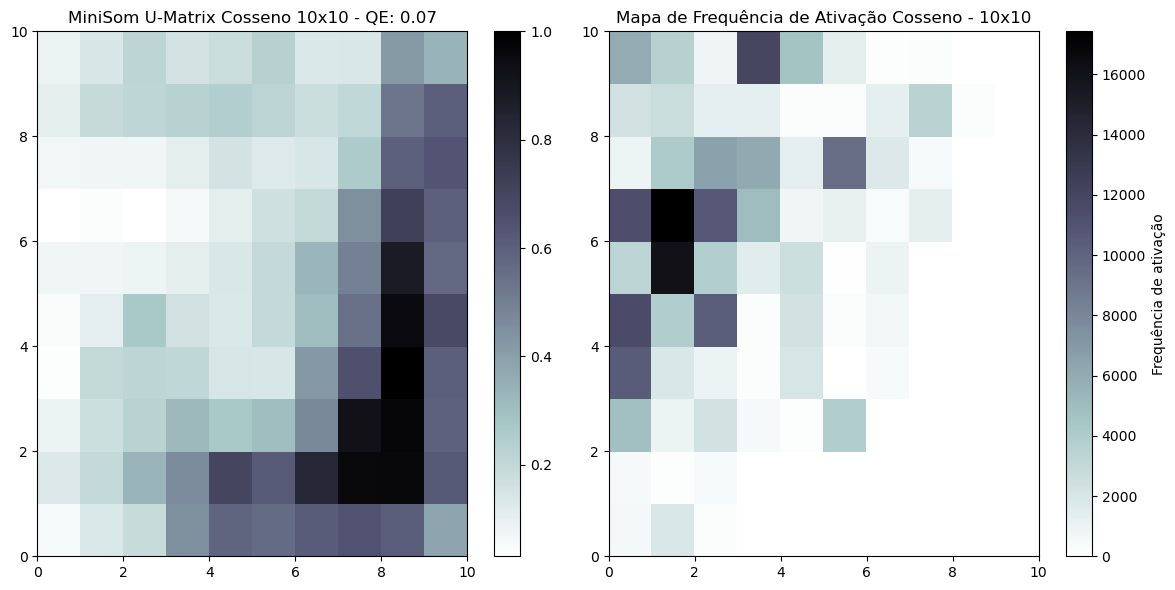

som_cos 11x11 - Erro de quantização: 0.05757631693358246


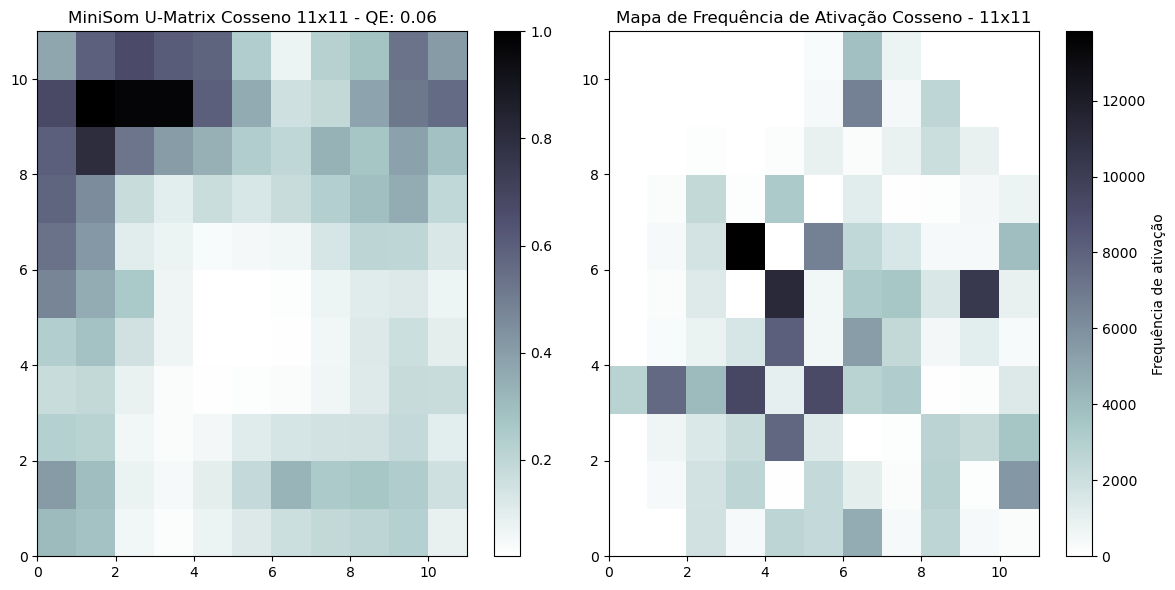

som_cos 12x12 - Erro de quantização: 0.06689403184145357


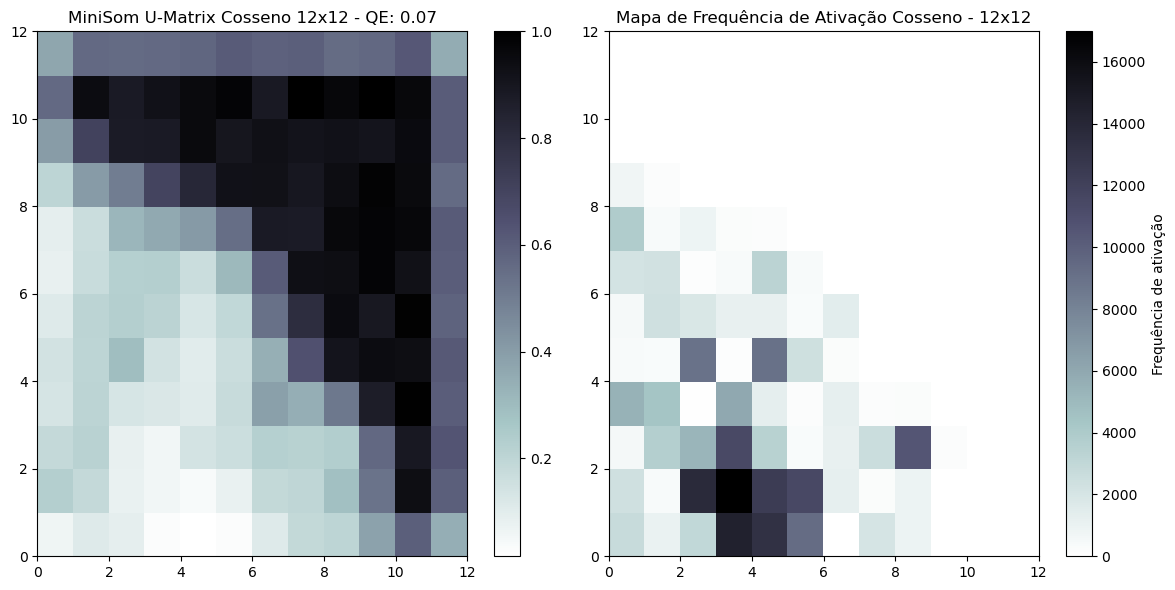

som_cos 13x13 - Erro de quantização: 0.06612125473740126


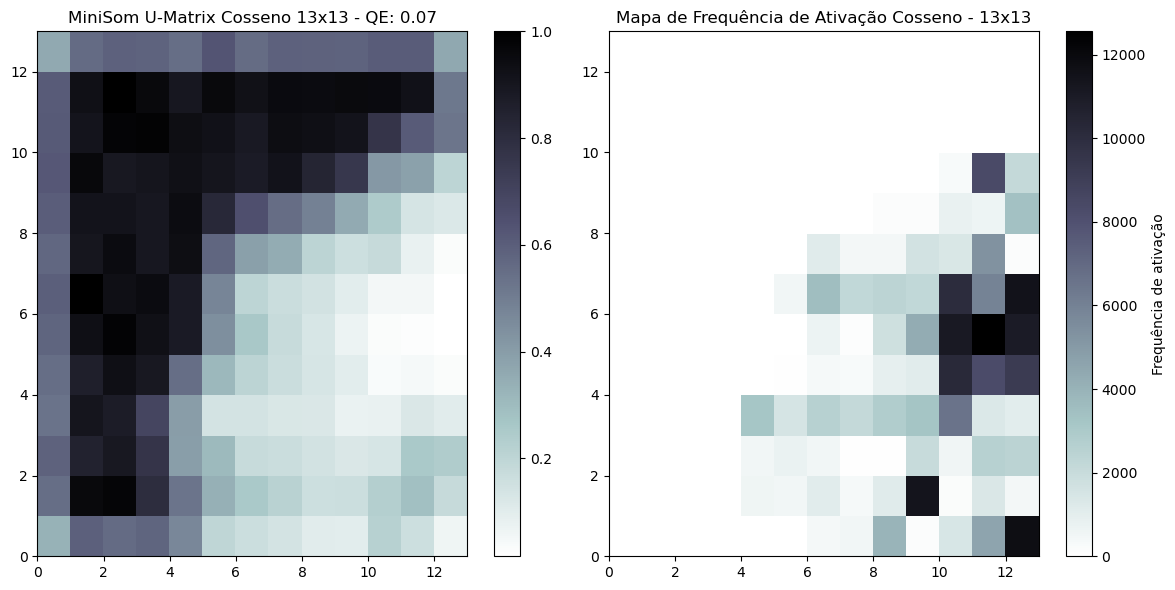

som_cos 14x14 - Erro de quantização: 0.05903969976035554


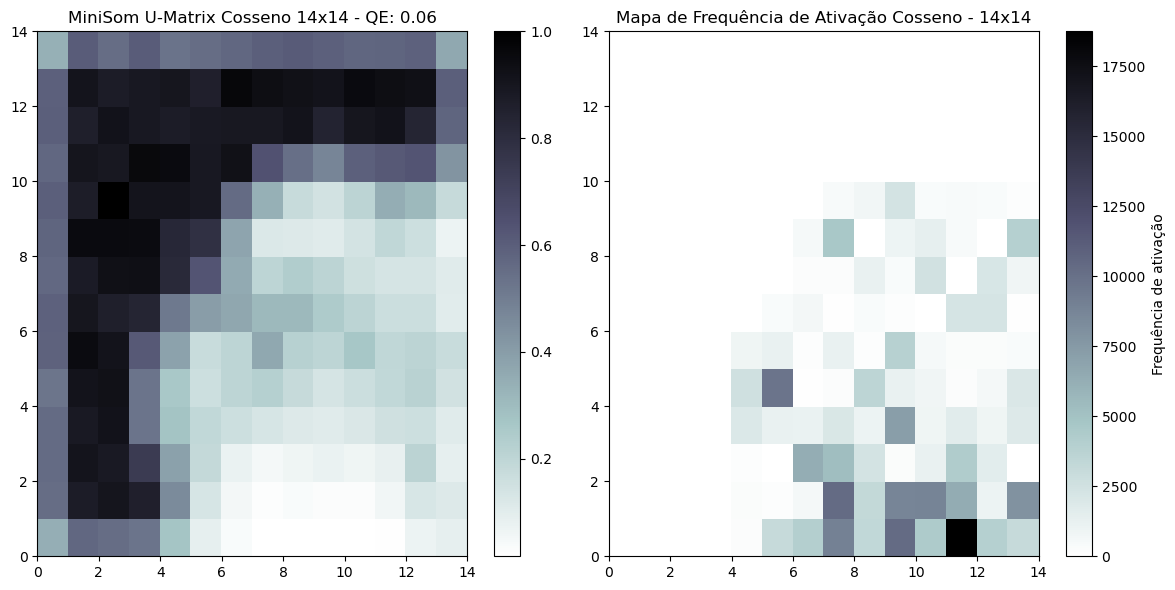

In [96]:
erro = []
sizes = []

for i in range(2, 15):
    som_cos = MiniSom(i, i, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.05, activation_distance='cosine', random_seed=42)
    som_cos.train_random(df_normalized_min, 50000)
    qe = som_cos.quantization_error(df_normalized_min)
    erro.append(qe)
    sizes.append(i)
    print(f"som_cos {i}x{i} - Erro de quantização: {qe}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Mapa de distância (U-Matrix)
    u_matrix = som_cos.distance_map().T
    grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
    fig.colorbar(grafico1, ax=axes[0])
    axes[0].set_title(f"MiniSom U-Matrix Cosseno {i}x{i} - QE: {round(qe, 2)}")

    # Mapa de Frequência de Ativação
    activation_map = np.zeros((i, i))
    for sample in df_normalized_min:
        winner = som_cos.winner(sample)
        activation_map[winner] += 1

    grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
    fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
    axes[1].set_title(f'Mapa de Frequência de Ativação Cosseno - {i}x{i}')

    plt.tight_layout()
    plt.show()

### MapaSom com 6x6, learning rate com 0.05 e iteration 50000:

In [98]:
som_cos = MiniSom(x=6, y=6, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.05, activation_distance='cosine', random_seed=42)
som_cos.train_random(df_normalized_min, num_iteration=50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.07740579068551819


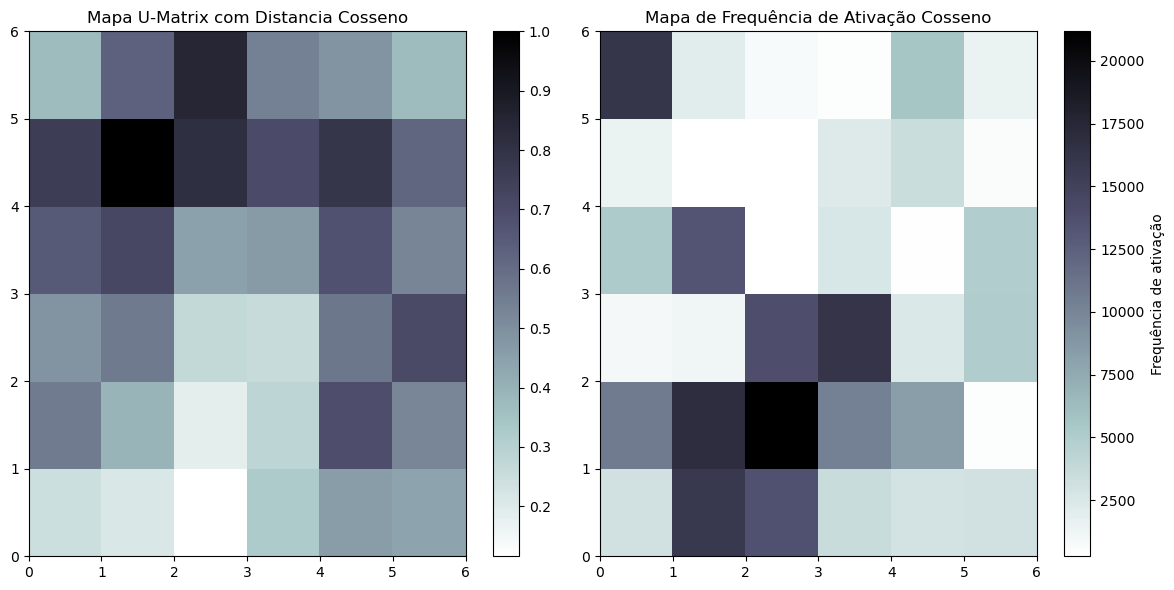

In [99]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som_cos.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix com Distancia Cosseno")

# Mapa de Frequência de Ativação
activation_map = np.zeros((6, 6))
for sample in df_normalized_min:
    winner = som_cos.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação Cosseno')

plt.tight_layout()
plt.show()

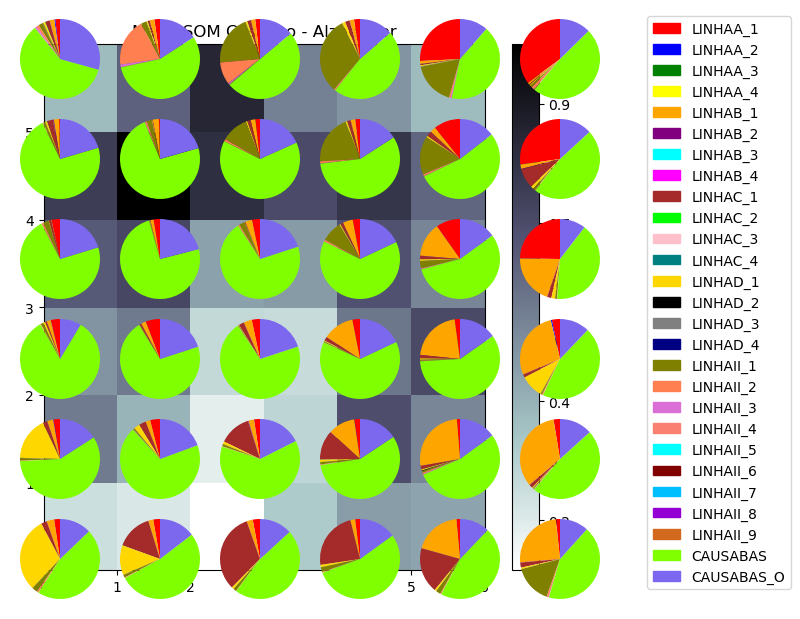

In [100]:
som_cos_size = (6,6)

weights = som_cos.get_weights()

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# U-Matrix
u_matrix = som_cos.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')  
plt.colorbar()
plt.title("Mapa SOM Cosseno - Alzheimer")
plt.tight_layout()

# Overlay pie charts
for i in range(som_cos_size[0]):
    for j in range(som_cos_size[1]):
        neuron_weights = weights[i, j]  

        # Zera valores negativos
        neuron_weights = np.clip(neuron_weights, a_min=0, a_max=None)

        # Pula neurônios vazios
        if neuron_weights.sum() == 0:
            continue
        
        
        neuron_weights = neuron_weights / np.sum(neuron_weights)  # Normalize
        
        # Get position for pie chart
        x, y = j, i  # Transpose to match image coordinates
        
        # Plot pie chart
        pie_ax = plt.axes([x/som_cos_size[1], 1-(y+1)/som_cos_size[0], 1/som_cos_size[1], 1/som_cos_size[0]])
        pie_ax.pie(neuron_weights, colors=colors, startangle=90)
        pie_ax.set_xticks([])  
        pie_ax.set_yticks([])  

# Legenda
patches = [Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
fig.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### MapaSom com 7x7, learning rate com 0.05 e iteration 50000:

In [102]:
som_cos = MiniSom(x=7, y=7, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.05, activation_distance='cosine', random_seed=42)
som_cos.train_random(df_normalized_min, num_iteration=50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.06997119756994216


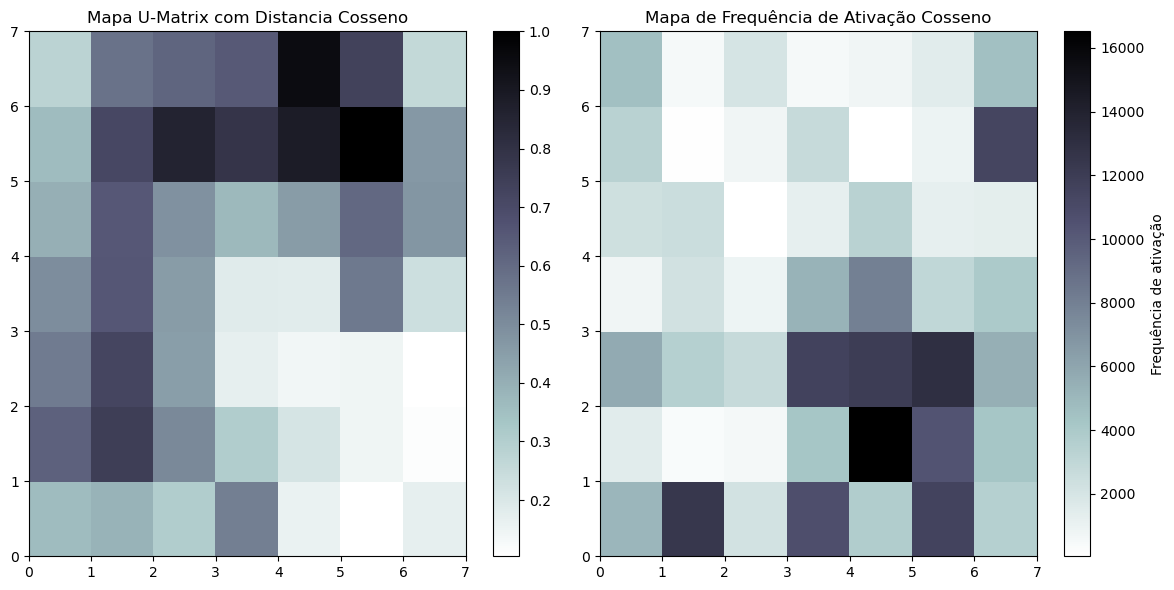

In [103]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som_cos.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix com Distancia Cosseno")

# Mapa de Frequência de Ativação
activation_map = np.zeros((7, 7))
for sample in df_normalized_min:
    winner = som_cos.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação Cosseno')

plt.tight_layout()
plt.show()

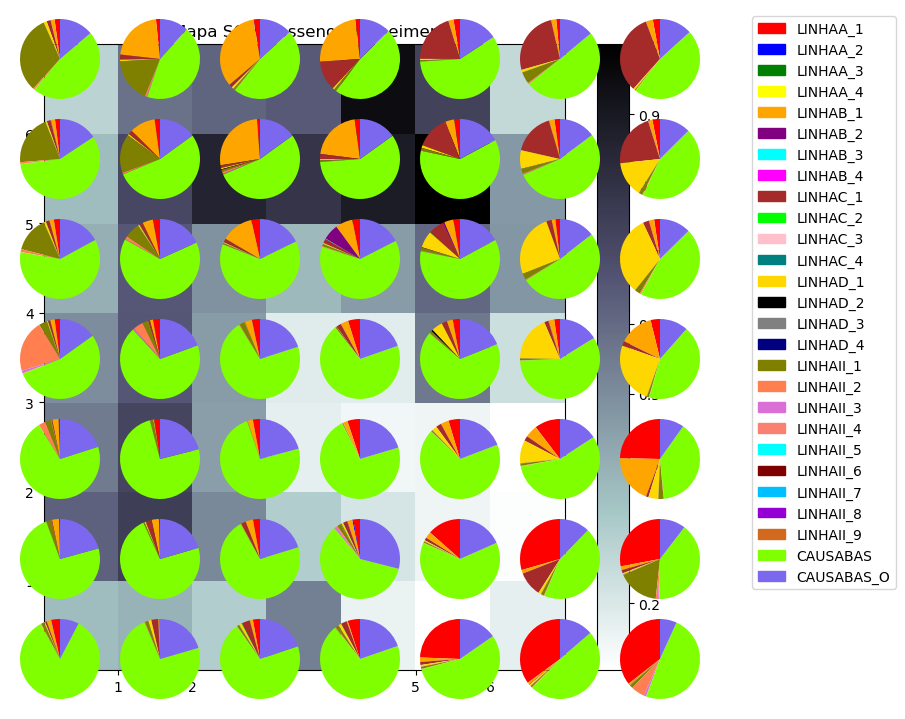

In [104]:
som_cos_size = (7,7)

weights = som_cos.get_weights()

# Create figure
fig, ax = plt.subplots(figsize=(7, 7))

# U-Matrix
u_matrix = som_cos.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')  
plt.colorbar()
plt.title("Mapa SOM Cosseno - Alzheimer")
plt.tight_layout()

# Overlay pie charts
for i in range(som_cos_size[0]):
    for j in range(som_cos_size[1]):
        neuron_weights = weights[i, j]  

        # Zera valores negativos
        neuron_weights = np.clip(neuron_weights, a_min=0, a_max=None)

        # Pula neurônios vazios
        if neuron_weights.sum() == 0:
            continue
        
        neuron_weights = neuron_weights / np.sum(neuron_weights)  # Normalize
        
        # Get position for pie chart
        x, y = j, i  # Transpose to match image coordinates
        
        # Plot pie chart
        pie_ax = plt.axes([x/som_cos_size[1], 1-(y+1)/som_cos_size[0], 1/som_cos_size[1], 1/som_cos_size[0]])
        pie_ax.pie(neuron_weights, colors=colors, startangle=90)
        pie_ax.set_xticks([])  
        pie_ax.set_yticks([])  

# Legenda
patches = [Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
fig.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [105]:
# Coordenada dos possíveis clusters
cluster_1 = [(4,0), (4,1), (4,2), (5,0), (5,1), (5,2), (6,1), (6,2)]
cluster_2 = [(0,5), (0,6)]
cluster_3 = [(6,5), (6,6)]

dados_cluster_1 = []
dados_cluster_2 = []
dados_cluster_3 = []

# Loop pelos dados normalizados
for i, sample in enumerate(df_normalized_min):
    winner = som_cos.winner(sample)

    # Verifica a qual cluster pertence o vencedor e salva os dados
    if winner in cluster_1:
        dados_cluster_1.append(df_training.iloc[i])
    elif winner in cluster_2:
        dados_cluster_2.append(df_training.iloc[i])
    elif winner in cluster_3:
        dados_cluster_3.append(df_training.iloc[i])

df_cluster_1 = pd.DataFrame(dados_cluster_1)
df_cluster_2 = pd.DataFrame(dados_cluster_2)
df_cluster_3 = pd.DataFrame(dados_cluster_3)

In [106]:
df_cluster_1

LINHAA_1  LINHAA_2  LINHAA_3  LINHAA_4  LINHAB_1  LINHAB_2  LINHAB_3  \
3           7300         0         0         0         0         0         0   
4           7300         0         0         0         0         0         0   
8           9500         0         0         0      7300         0         0   
9          10960         0         0         0      7300         0         0   
12         10960         0         0         0     10189         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
211583     10960         0         0         0     10159         0         0   
211586     10969         0         0         0      7309         0         0   
211588         0         0         0         0      9509         0         0   
211589      7309         0         0         0         0         0         0   
211592      1403         0         0         0     10189         0         0   

        LINHAB_4  LINHAC_1  LINHAC_2  ...  LINHAII_2  LINHAII_3  LINHAII_4  \
3              0         0         0  ...          0          0          0   
4              0         0         0  ...          0          0          0   
8              0         0         0  ...          0          0          0   
9              0         0         0  ...          0          0          0   
12             0      9500         0  ...          0          0          0   
...          ...       ...       ...  ...        ...        ...        ...   
211583         0      7309         0  ...          0          0          0   
211586         0         0         0  ...          0          0          0   
211588         0      5788         0  ...          0          0          0   
211589         0         0         0  ...          0          0          0   
211592         0         0         0  ...          0          0          0   

        LINHAII_5  LINHAII_6  LINHAII_7  LINHAII_8  LINHAII_9  CAUSABAS  \
3               0          0          0          0          0      7300   
4               0          0          0          0          0      7300   
8               0          0          0          0          0      7300   
9               0          0          0          0          0      7300   
12              0          0          0          0          0      7300   
...           ...        ...        ...        ...        ...       ...   
211583          0          0          0          0          0      7309   
211586          0          0          0          0          0      7309   
211588          0          0          0          0          0      7309   
211589          0          0          0          0          0      7309   
211592          0          0          0          0          0      7309   

        CAUSABAS_O  
3             7300  
4             7300  
8             7300  
9             7300  
12            7300  
...            ...  
211583        7309  
211586        7309  
211588        7309  
211589        7309  
211592        7309  

[76920 rows x 27 columns]

In [107]:
df_cluster_2

LINHAA_1  LINHAA_2  LINHAA_3  LINHAA_4  LINHAB_1  LINHAB_2  LINHAB_3  \
51         18688         0         0         0      7301         0         0   
52         96424         0         0         0      7309         0         0   
57         10189         0         0         0      7309         0         0   
58          7309         0         0         0     54324         0         0   
59         18688         0         0         0      7309         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
211485     10960         0         0         0     10690         0         0   
211520     18688         0         0         0         0         0         0   
211541     73024         0         0         0      6102         0         0   
211556      9461         0         0         0      7309         0         0   
211568     10960         0         0         0     10180         0         0   

        LINHAB_4  LINHAC_1  LINHAC_2  ...  LINHAII_2  LINHAII_3  LINHAII_4  \
51             0    185424         0  ...          0          0          0   
52             0    185424         0  ...          0          0          0   
57             0    185424         0  ...          0          0          0   
58             0    185424         0  ...          0          0          0   
59             0    185424         0  ...          0          0          0   
...          ...       ...       ...  ...        ...        ...        ...   
211485         0    181324         0  ...          0          0          0   
211520         0    186424         0  ...          0          0          0   
211541         0    185424         0  ...          0          0          0   
211556         0    185424         0  ...          0          0          0   
211568         0    181324         0  ...          0          0          0   

        LINHAII_5  LINHAII_6  LINHAII_7  LINHAII_8  LINHAII_9  CAUSABAS  \
51              0          0          0          0          0      7301   
52              0          0          0          0          0      7301   
57              0          0          0          0          0      7301   
58              0          0          0          0          0      7301   
59              0          0          0          0          0      7301   
...           ...        ...        ...        ...        ...       ...   
211485          0          0          0          0          0      7309   
211520          0          0          0          0          0      7309   
211541          0          0          0          0          0      7309   
211556          0          0          0          0          0      7309   
211568          0          0          0          0          0      7309   

        CAUSABAS_O  
51            7301  
52            7301  
57            7301  
58            7301  
59            7301  
...            ...  
211485       10180  
211520        7309  
211541        7309  
211556        7309  
211568        7309  

[7939 rows x 27 columns]

In [108]:
df_cluster_3

LINHAA_1  LINHAA_2  LINHAA_3  LINHAA_4  LINHAB_1  LINHAB_2  LINHAB_3  \
11        189924         0         0         0     10960         0         0   
36        185424         0         0         0     10189         0         0   
88        189824         0         0         0      7301         0         0   
156       189924         0         0         0         0         0         0   
237       185424         0         0         0      7301         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
211564    189924         0         0         0         0         0         0   
211572    189924         0         0         0         0         0         0   
211584    189924         0         0         0         0         0         0   
211585    189824         0         0         0         0         0         0   
211590    185424         0         0         0         0         0         0   

        LINHAB_4  LINHAC_1  LINHAC_2  ...  LINHAII_2  LINHAII_3  LINHAII_4  \
11             0      7300         0  ...          0          0          0   
36             0      7300         0  ...          0          0          0   
88             0         0         0  ...          0          0          0   
156            0         0         0  ...          0          0          0   
237            0      9500         0  ...          0          0          0   
...          ...       ...       ...  ...        ...        ...        ...   
211564         0         0         0  ...      91024          0          0   
211572         0         0         0  ...      91024          0          0   
211584         0         0         0  ...          0          0          0   
211585         0         0         0  ...          0          0          0   
211590         0         0         0  ...      91024          0          0   

        LINHAII_5  LINHAII_6  LINHAII_7  LINHAII_8  LINHAII_9  CAUSABAS  \
11              0          0          0          0          0      7300   
36              0          0          0          0          0      7300   
88              0          0          0          0          0      7301   
156             0          0          0          0          0      7301   
237             0          0          0          0          0      7301   
...           ...        ...        ...        ...        ...       ...   
211564          0          0          0          0          0      7309   
211572          0          0          0          0          0      7309   
211584          0          0          0          0          0      7309   
211585          0          0          0          0          0      7309   
211590          0          0          0          0          0      7309   

        CAUSABAS_O  
11            7300  
36            7300  
88            7301  
156           1899  
237           7301  
...            ...  
211564        7309  
211572        7309  
211584        7309  
211585        7309  
211590        7309  

[15961 rows x 27 columns]